<a href="https://colab.research.google.com/github/SmritiSharma1209/Mtech-DSA-LAB/blob/main/CROP_PREDICTION_USING_ML_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import ipywidgets
from ipywidgets import interact

import warnings
warnings.filterwarnings('ignore')

# **LOADING THE DATA**

In [ ]:
crops_df= pd.read_csv("/content/Crop_recommendation_Updated.csv")
crops_df.head()

N      P      K  temperature   humidity        ph    rainfall  \
0  52.02  37.02  51.34     1.395179  46.579188  6.332919  105.272329   
1  62.71  47.71  58.47    51.750697  54.662403  6.511772  166.146187   
2  61.46  46.46  57.64    53.017400  49.864205  5.299104   65.959049   
3  53.83  38.83  52.55    53.211092  61.440867  5.322864   64.152838   
4  57.43  42.43  54.95    50.875089  52.118891  7.377994  163.452682   

         label  
0  adzukibeans  
1  adzukibeans  
2  adzukibeans  
3  adzukibeans  
4  adzukibeans

# **UNDERSTANDING THE DATASET**


In [ ]:
crops_df.shape

(3100, 8)

In [ ]:
crops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            3100 non-null   float64
 1   P            3100 non-null   float64
 2   K            3100 non-null   float64
 3   temperature  3100 non-null   float64
 4   humidity     3100 non-null   float64
 5   ph           3100 non-null   float64
 6   rainfall     3100 non-null   float64
 7   label        3100 non-null   object 
dtypes: float64(7), object(1)
memory usage: 193.9+ KB


In [ ]:
crops_df.describe()

N            P            K  temperature     humidity  \
count  3100.000000  3100.000000  3100.000000  3100.000000  3100.000000   
mean     54.437329    52.848839    50.473855    27.082660    66.005312   
std      38.375648    30.110741    45.271875     7.579649    24.007713   
min       0.000000     5.000000     5.000000     1.395179    10.034048   
25%      24.837500    31.000000    22.740000    22.799590    55.244920   
50%      40.040000    49.135000    39.000000    26.090181    68.980529   
75%      85.000000    67.000000    52.900000    29.353375    84.446524   
max     149.780000   145.000000   205.000000    54.986760    99.981876   

                ph     rainfall  
count  3100.000000  3100.000000  
mean      6.368913   110.213031  
std       0.809477    64.048562  
min       3.504752    20.211267  
25%       5.895343    64.909095  
50%       6.342518    97.057093  
75%       6.841616   141.210784  
max       9.935091   397.315380

In [ ]:
crops_df['label'].value_counts()

adzukibeans    100
mothbeans      100
watermelon     100
tobacco        100
tea            100
sugarcane      100
rubber         100
rice           100
pomegranate    100
pigeonpeas     100
peas           100
papaya         100
orange         100
muskmelon      100
mungbean       100
millet         100
apple          100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
groundnut      100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
banana         100
wheat          100
Name: label, dtype: int64

In [ ]:
crops_df.apply(lambda x : len(x.unique()))

N               973
P               931
K               910
temperature    3000
humidity       3100
ph             3100
rainfall       3100
label            31
dtype: int64

# **CHECKING FOR NAN VALUES**

In [ ]:
crops_df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# **REMOVING THE DUPLICATE VALUES**

In [ ]:
def checking_removing_duplicates(df):
    count_dups = df.duplicated().sum()
    print("Number of Duplicates: ", count_dups)
    if (count_dups >= 1):
        df.drop_duplicates(inplace=True)
        print('Duplicate values removed!')
    else:
        print('No Duplicate values')
    
checking_removing_duplicates(crops_df)

Number of Duplicates:  0
No Duplicate values


# **REMOVING THE OUTLIERS**

In [ ]:
#All columns contain outliers except for rice and label you can check outliers by using boxplot
Q1 = crops_df.quantile(0.25)
Q3 = crops_df.quantile(0.75)
IQR = Q3 - Q1

crops_df_outliers = crops_df[~((crops_df < (Q1 - 1.5 * IQR)) |(crops_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# **DESCRIPTIVE STATISTICS**

**Average Value Of Each Feature in the DataSet**

In [ ]:
print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(crops_df['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(crops_df['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(crops_df['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(crops_df['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(crops_df['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(crops_df['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(crops_df['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 54.44
Average Ratio of Phosphorous in the Soil : 52.85
Average Ratio of Potassium in the Soil : 50.47
Average Tempature in Celsius : 27.08
Average Relative Humidity in % : 66.01
Average PH Value of the soil : 6.37
Average Rainfall in mm : 110.21


**Min , Max , Average requirement of N , P , K , Temperature , Humidity , Ph , Rainfall for each crop**

In [ ]:
@interact

def summary(crops = list(crops_df['label'].value_counts().index)):
    x = crops_df[crops_df['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('adzukibeans', 'mothbeans', 'watermelon', 'tobacc…

**Listing the average value of a particular feature for all the crops.**

In [ ]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(crops_df[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(crops_df[(crops_df['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(crops_df[crops_df['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(crops_df[(crops_df['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(crops_df[crops_df['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(crops_df[(crops_df['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(crops_df[crops_df['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(crops_df[(crops_df['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(crops_df[crops_df['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(crops_df[(crops_df['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(crops_df[crops_df['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(crops_df[(crops_df['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(crops_df[crops_df['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(crops_df[(crops_df['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(crops_df[crops_df['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(crops_df[(crops_df['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(crops_df[crops_df['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(crops_df[(crops_df['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(crops_df[crops_df['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(crops_df[(crops_df['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(crops_df[crops_df['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(crops_df[(crops_df['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(crops_df[crops_df['label'] == 'coffee'][conditions].mean()))
    print("Wheat : {0:.2f}".format(crops_df[(crops_df['label'] == 'wheat')][conditions].mean()))
    print("Tea : {0:.2f}".format(crops_df[crops_df['label'] == 'tea'][conditions].mean()))
    print("Millet : {0:.2f}".format(crops_df[(crops_df['label'] == 'millet')][conditions].mean()))
    print("GroundNut : {0:.2f}".format(crops_df[crops_df['label'] == 'groundnut'][conditions].mean()))
    print("Peas : {0:.2f}".format(crops_df[(crops_df['label'] == 'Peas')][conditions].mean()))
    print("Rubber : {0:.2f}".format(crops_df[crops_df['label'] == 'rubber'][conditions].mean()))
    print("Sugarcane : {0:.2f}".format(crops_df[(crops_df['label'] == 'sugarcane')][conditions].mean()))
    print("Tobacco : {0:.2f}".format(crops_df[crops_df['label'] == 'tobacco'][conditions].mean()))
    print("Adzuki Beans : {0:.2f}".format(crops_df[(crops_df['label'] == 'adzukibeans')][conditions].mean()))
 

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

**Separating crops on the basis of Average value of the features ( N , P , K , Temperature , Humidity , ph , Rainfall )**

In [ ]:
@interact

def compare(conditions=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
  
  print("Crops which require {} greater than Average".format(conditions), '\n')
  print(crops_df[ crops_df[conditions] > crops_df[conditions].mean()]['label'].unique(), '\t')
  print('---------------------------------------------------------------')
  print("Crops which require {} less than Average".format( conditions) , '\n')
  print(crops_df[ crops_df[conditions] < crops_df[conditions].mean()]['label'].unique())



interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

**Classifying Crops on the Basis of Season**

In [ ]:
print("Summer Crops")
print(crops_df[(crops_df['temperature'] > 30) & (crops_df['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(crops_df[(crops_df['temperature'] < 20) & (crops_df['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(crops_df[(crops_df['rainfall'] > 200) & (crops_df['humidity'] > 30)]['label'].unique())

Summer Crops
['adzukibeans' 'blackgram' 'grapes' 'groundnut' 'mango' 'mothbeans'
 'orange' 'papaya' 'pigeonpeas' 'rubber' 'wheat']
-----------------------------------
Winter Crops
['adzukibeans' 'grapes' 'groundnut' 'lentil' 'maize' 'orange' 'pigeonpeas'
 'pomegranate' 'tobacco']
-----------------------------------
Rainy Crops
['coconut' 'papaya' 'rice' 'rubber' 'tea']


# **Exploratory Data Analysis - Visualization**

Pictorial Representation to illustrate that the dataset is **Balanced**

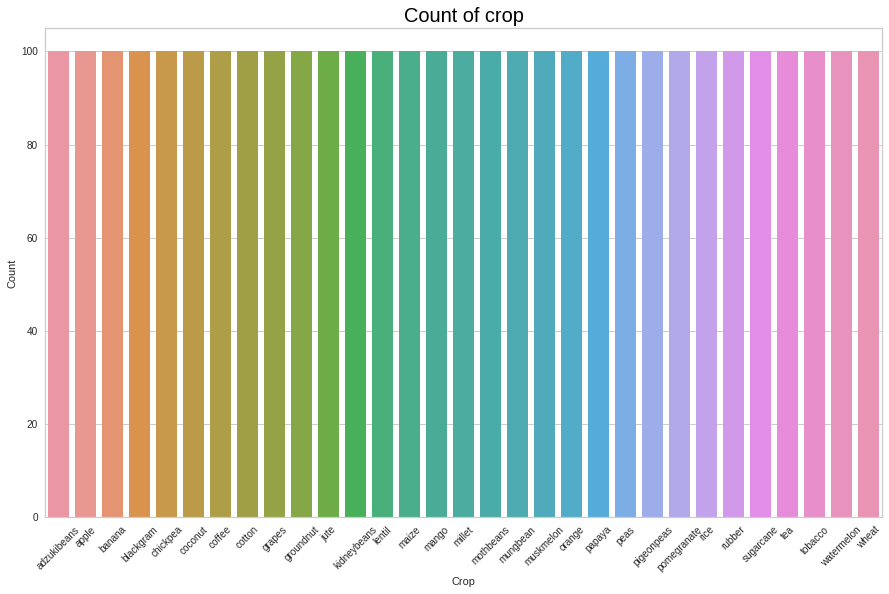

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.countplot(data=crops_df, x='label')
ax.set(xlabel='Crop')
ax.set(ylabel='Count')
plt.xticks(rotation=45)

plt.title('Count of crop', fontsize = 20, c='black')
plt.savefig('Balanced Dataset.tiff', dpi=300)
plt.show()

**Correlation between the Features**

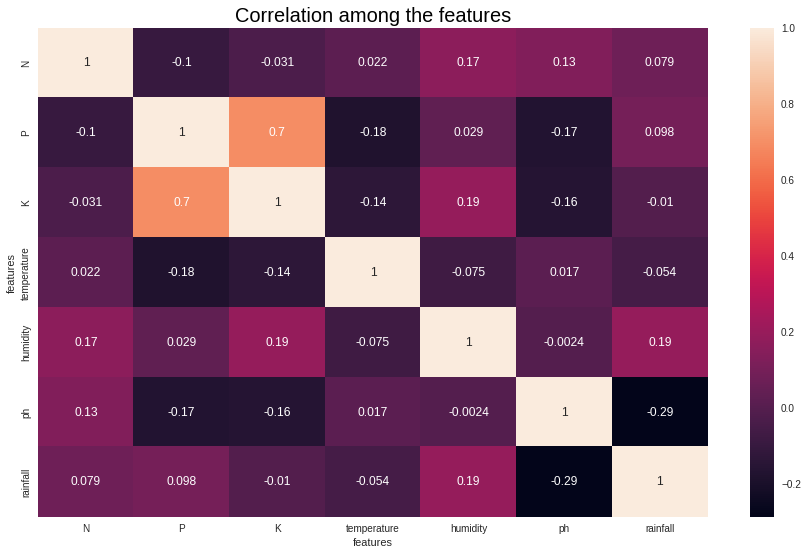

In [ ]:
fig, ax= plt.subplots(1,1, figsize=(15,9))
sns.heatmap(crops_df.corr(), annot=True)
ax.set(xlabel="features")
ax.set(ylabel="features")

plt.title("Correlation among the features", fontsize=20, c= "Black")
plt.savefig('Correlation among the features.tiff', dpi=300)
plt.show()


**Density plots for all Features**

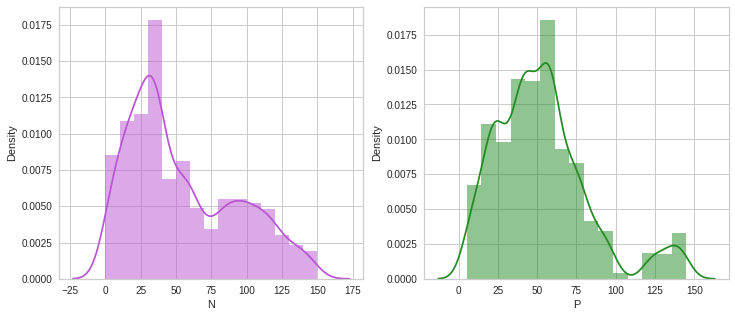

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(crops_df['N'],color="mediumorchid",bins=15,hist_kws={'alpha':0.5} )
plt.savefig('Density Plot for Nitrogen Content in the soil.tiff', dpi=300)

plt.subplot(1, 2, 2)
sns.distplot(crops_df['P'],color="forestgreen",bins=15,hist_kws={'alpha':0.5})
plt.savefig('Density Plot for Phosphorus Content in the soil.tiff', dpi=300)




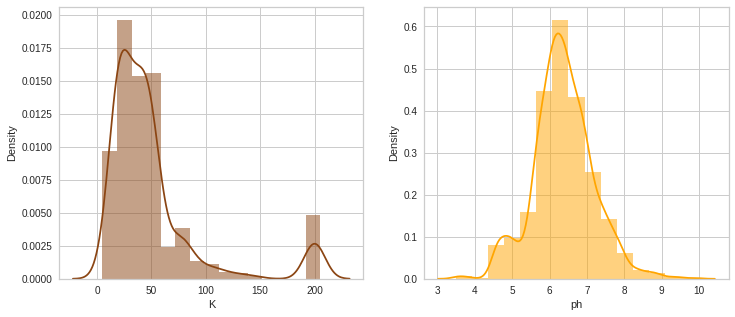

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(crops_df['K'],color="saddlebrown", bins=15, hist_kws={'alpha': 0.5})
plt.savefig('Density Plot for Potassium Content in the soil.tiff', dpi=300)

plt.subplot(1,2,2)
sns.distplot(crops_df['ph'], color="orange", bins=15,  hist_kws={'alpha': 0.5})
plt.savefig('Density Plot for ph levels in the soil.tiff', dpi=300)

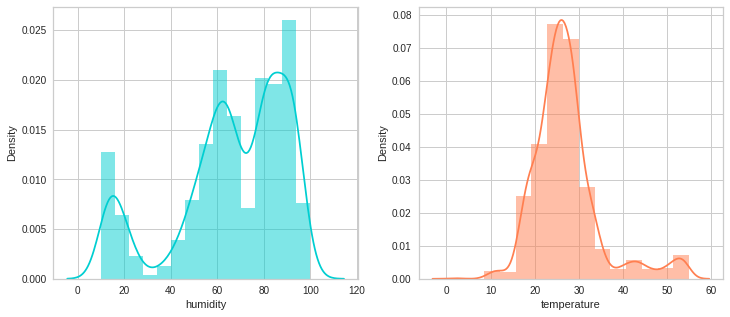

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(crops_df['humidity'], color="darkturquoise", bins=15,  hist_kws={'alpha': 0.5})
plt.savefig('Density Plot for Relative Humidity in %.tiff', dpi=300)

plt.subplot(1,2,2)
sns.distplot(crops_df['temperature'],color="coral", bins=15, hist_kws={'alpha': 0.5})
plt.savefig('Density Plot for Temperature in degree Celsius.tiff', dpi=300)



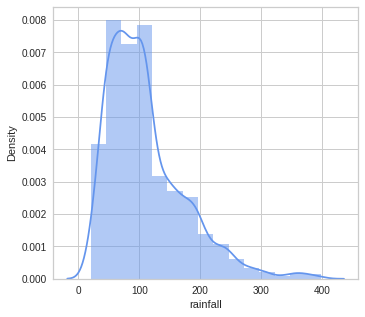

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(crops_df['rainfall'],color="cornflowerblue", bins=15, hist_kws={'alpha': 0.5})
plt.savefig('Density Plot for Rainfall in mm .tiff', dpi=300)


**PairPlots One vs All**

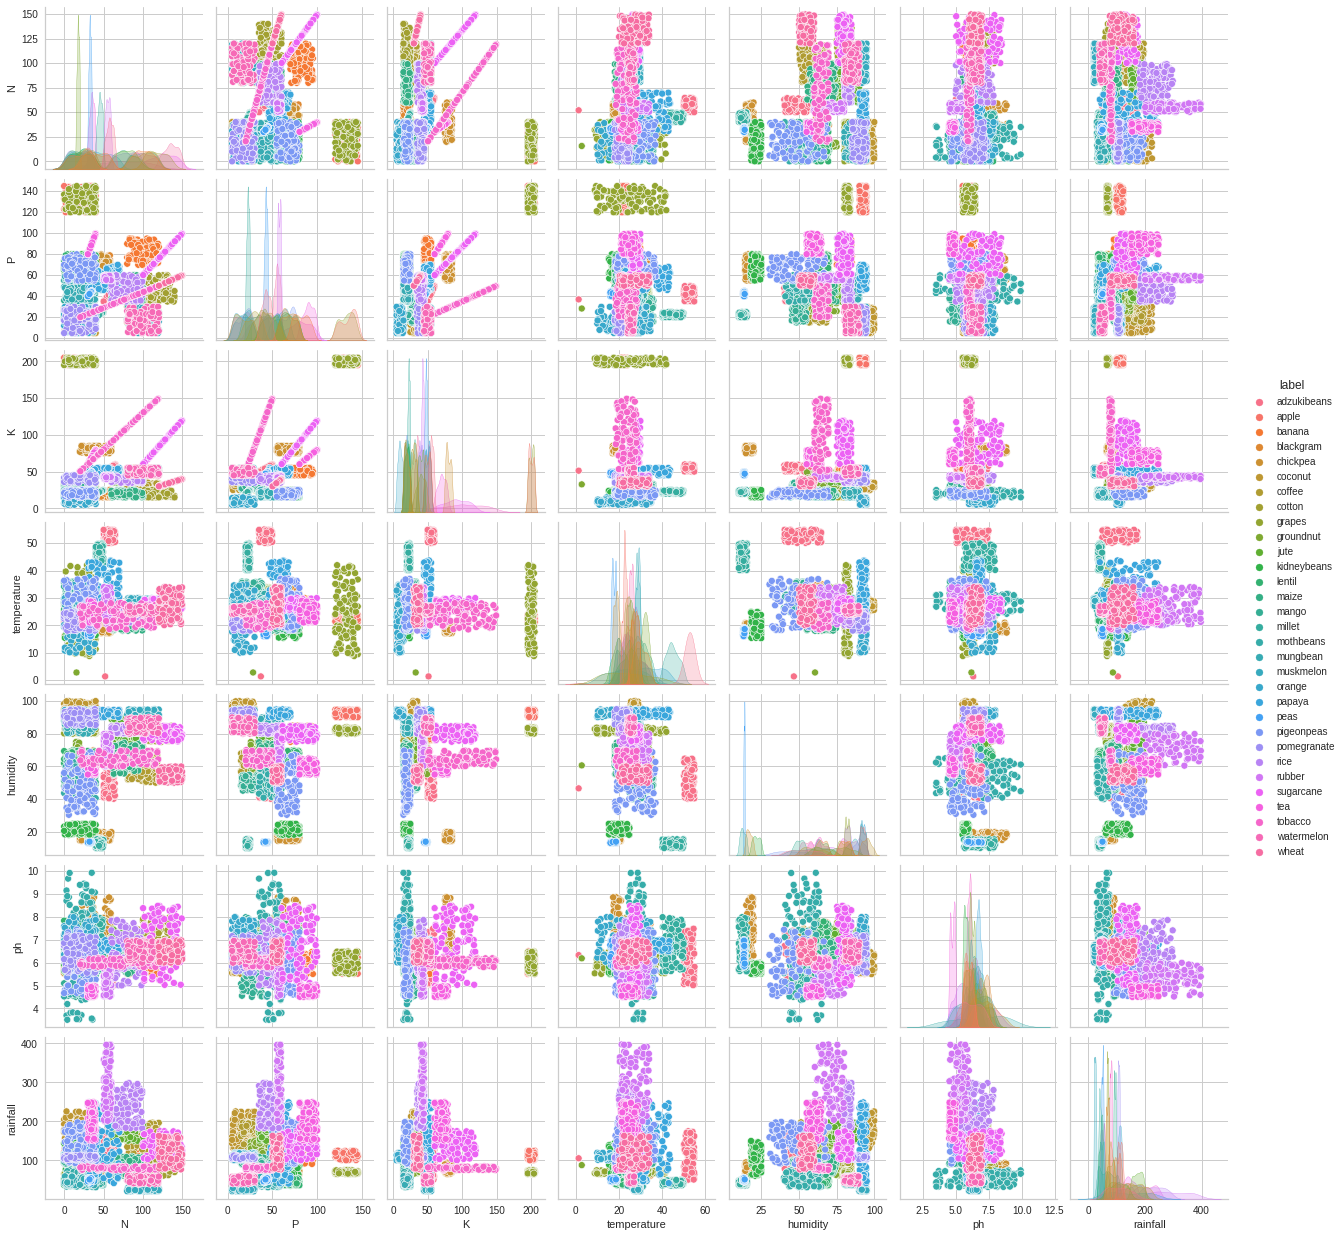

In [ ]:
sns.pairplot(crops_df,hue = 'label')
plt.savefig('Combined Relationship between N, P, K, temperature, humidity, ph, rainfall.tiff', dpi=300)

**Comparison between N , P , K values for different crops**


In [ ]:
crops_mean = pd.pivot_table(crops_df,index=['label'],aggfunc='mean')
crops_mean.head()

K         N         P   humidity        ph    rainfall  \
label                                                                        
adzukibeans   55.1233   57.6858   42.6858  52.423402  6.206098  106.820950   
apple        199.8900   20.8000  134.2200  92.333383  5.929663  112.654779   
banana        50.0500  100.2300   82.0100  80.358123  5.983893  104.626980   
blackgram     19.2400   40.0200   67.4700  65.118426  7.133952   67.884151   
chickpea      79.9200   40.0900   67.7900  16.860439  7.336957   80.058977   

             temperature  
label                     
adzukibeans    52.185384  
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crops_mean.index,
    y=crops_mean['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crops_mean.index,
    y=crops_mean['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crops_mean.index,
    y=crops_mean['K'],
    name='Potash',
    marker_color='dodgerblue'
))


fig.update_layout(title="N-P-K values comparison among the crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

plt.savefig('N-P-K values comparision among the crops.tiff', dpi=300)
plt.show()

fig.show()

<Figure size 576x396 with 0 Axes>

**Comparison between Temperature , Humidity , Rainfall for different crops**

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=crops_mean.index,
    y=crops_mean['temperature'],
    name='Temp',
    marker_color='greenyellow'
))
fig.add_trace(go.Bar(
    x=crops_mean.index,
    y=crops_mean['humidity'],
    name='Humidity',
    marker_color='coral'
))

fig.add_trace(go.Bar(
    x=crops_mean.index,
    y=crops_mean['rainfall'],
    name='Rainfall',
    marker_color='cornflowerblue'
))

fig.update_layout(title="Temperature-Humidity-Rainfall values comparison among the Crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.savefig('Temperature-Humidity-Rainfall values comparision among the Crops.tiff', dpi=300)
fig.show()

<Figure size 576x396 with 0 Axes>

**Box plot for all the Features**

**Nitrogen**

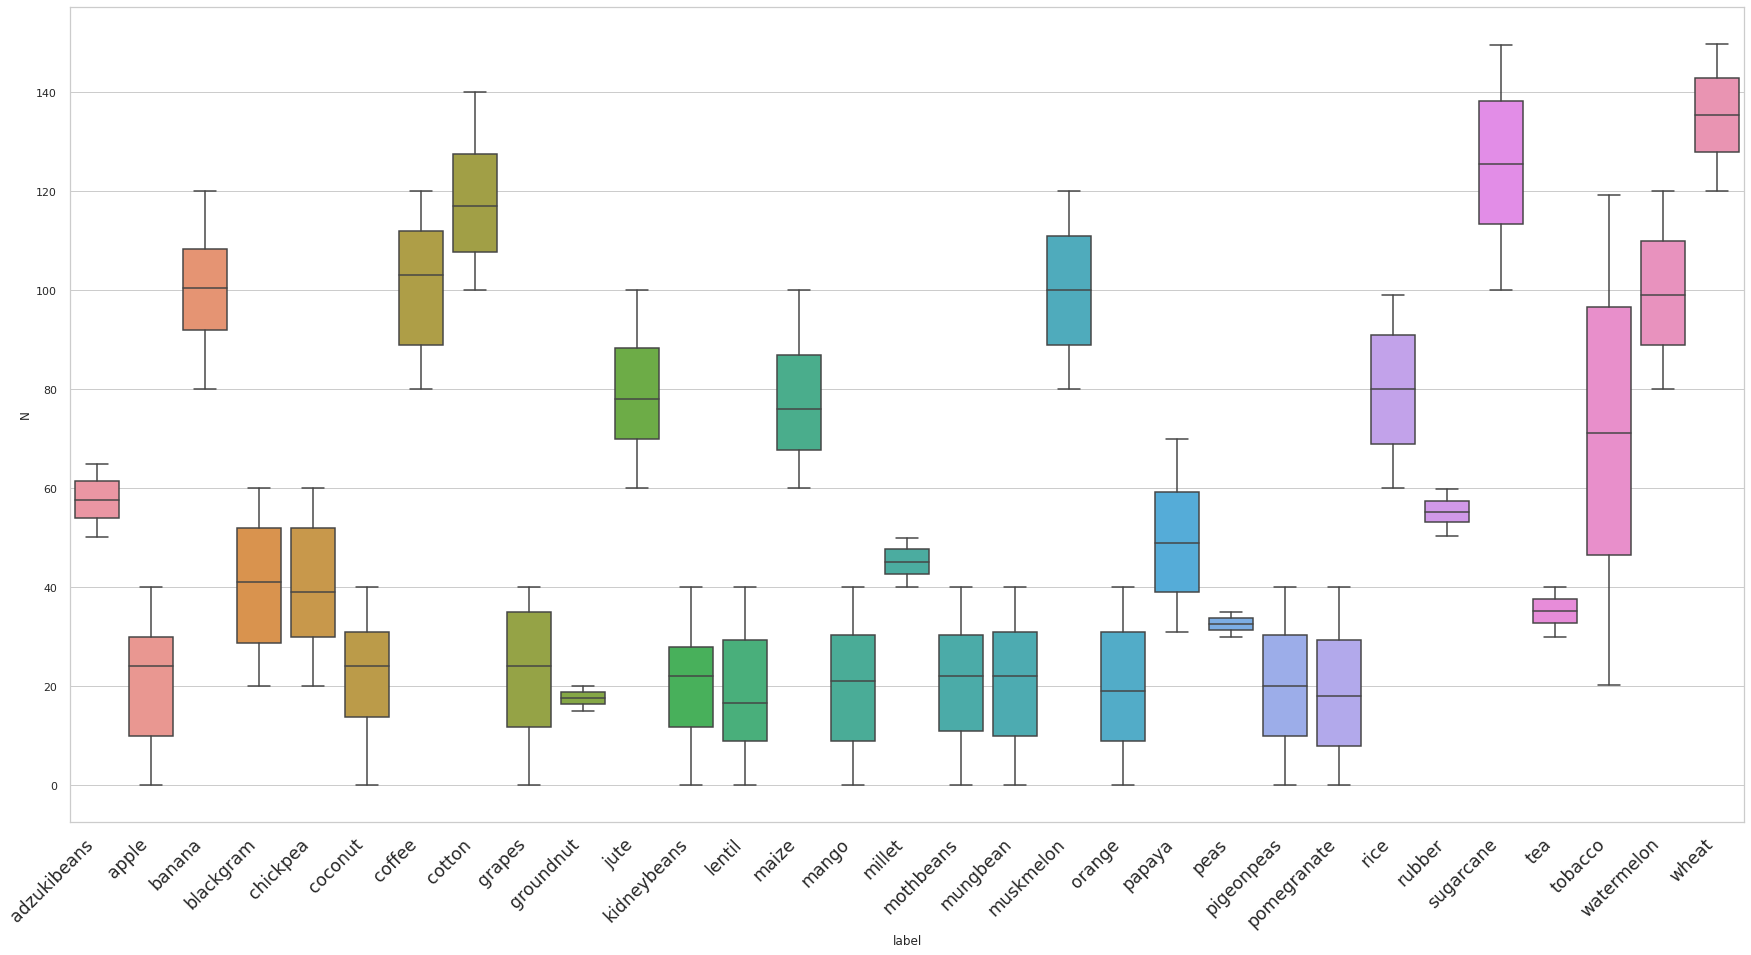

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='N',data=crops_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.savefig('Box Plot for Nitrogen Content in the soil.tiff', dpi=300)
None

**Phosphorus**

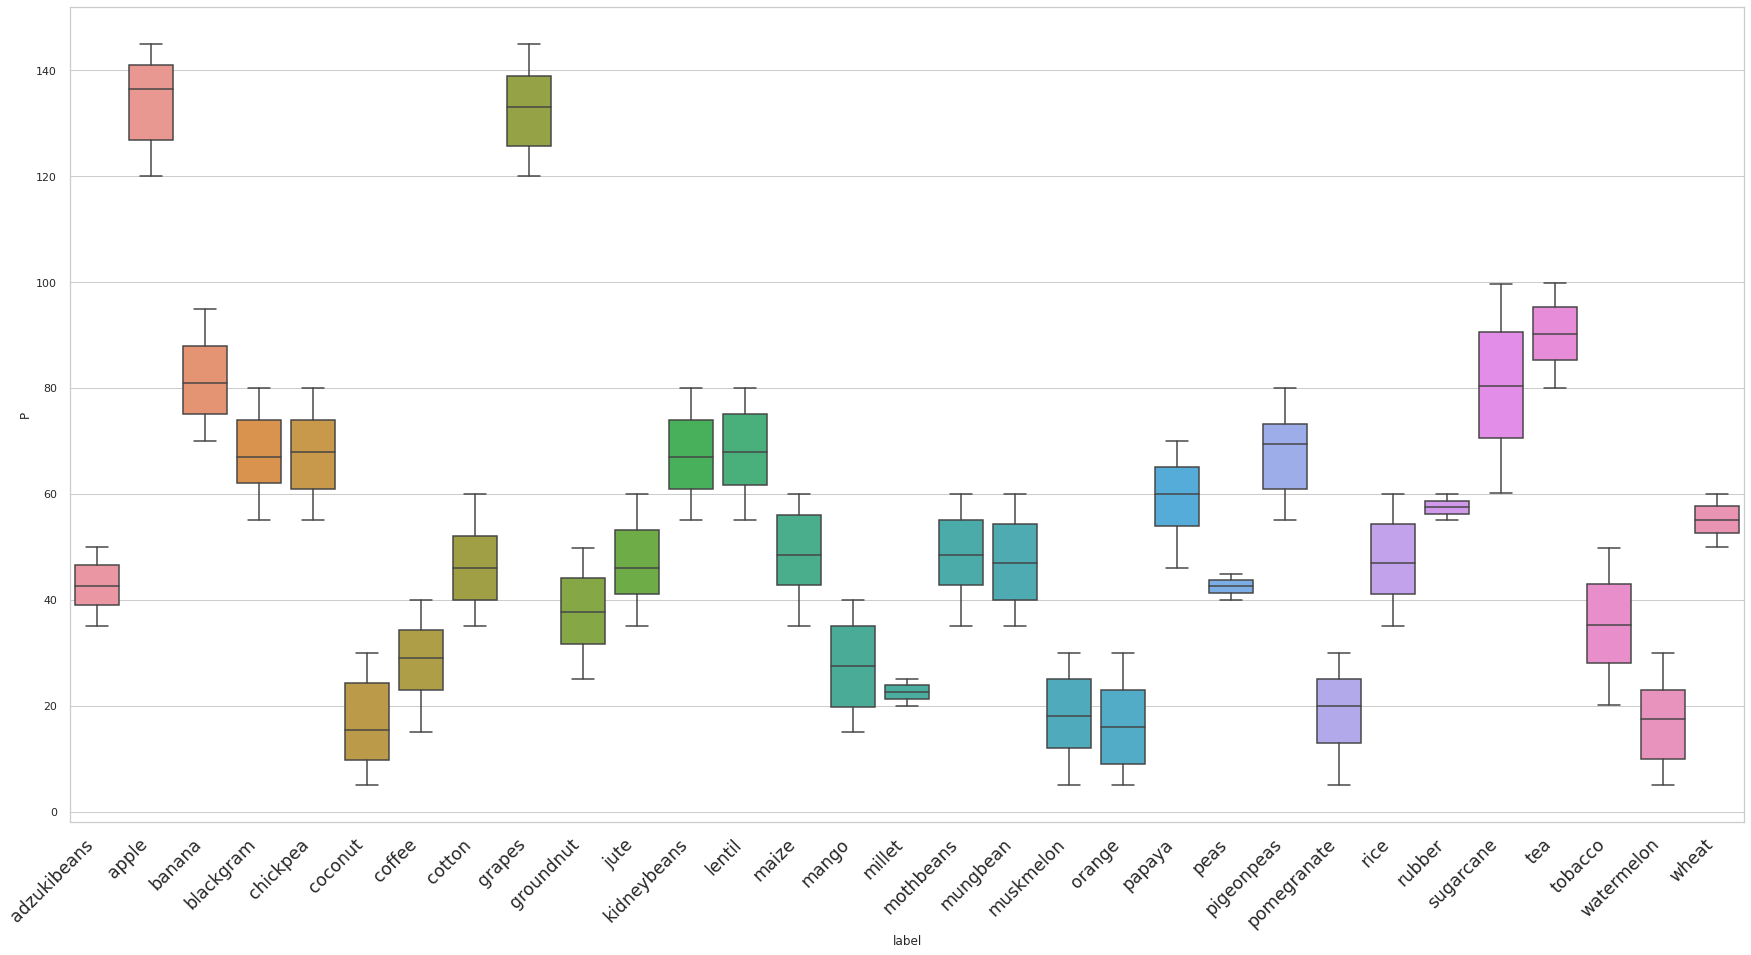

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='P',data=crops_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.savefig('Box Plot for Phosphorus Content in the soil.tiff', dpi=300)
None



**Potassium**

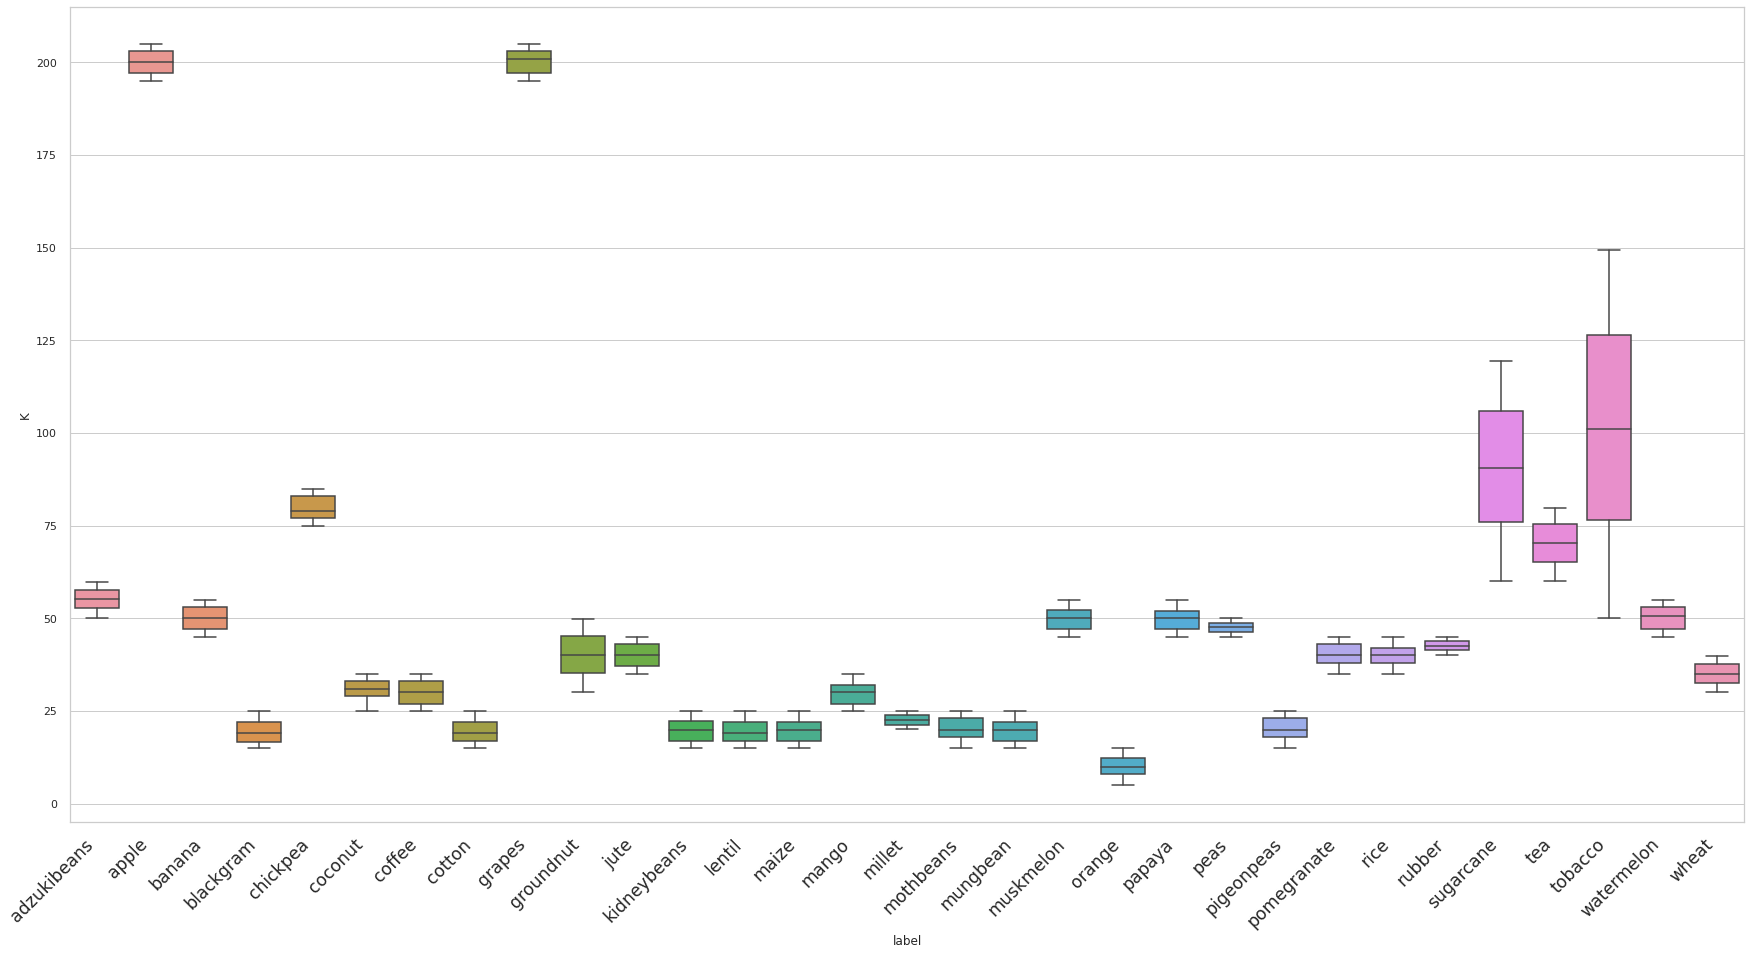

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='K',data=crops_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.savefig('Box Plot for Potassium Content in the soil.tiff', dpi=300)
None

**Temperature**

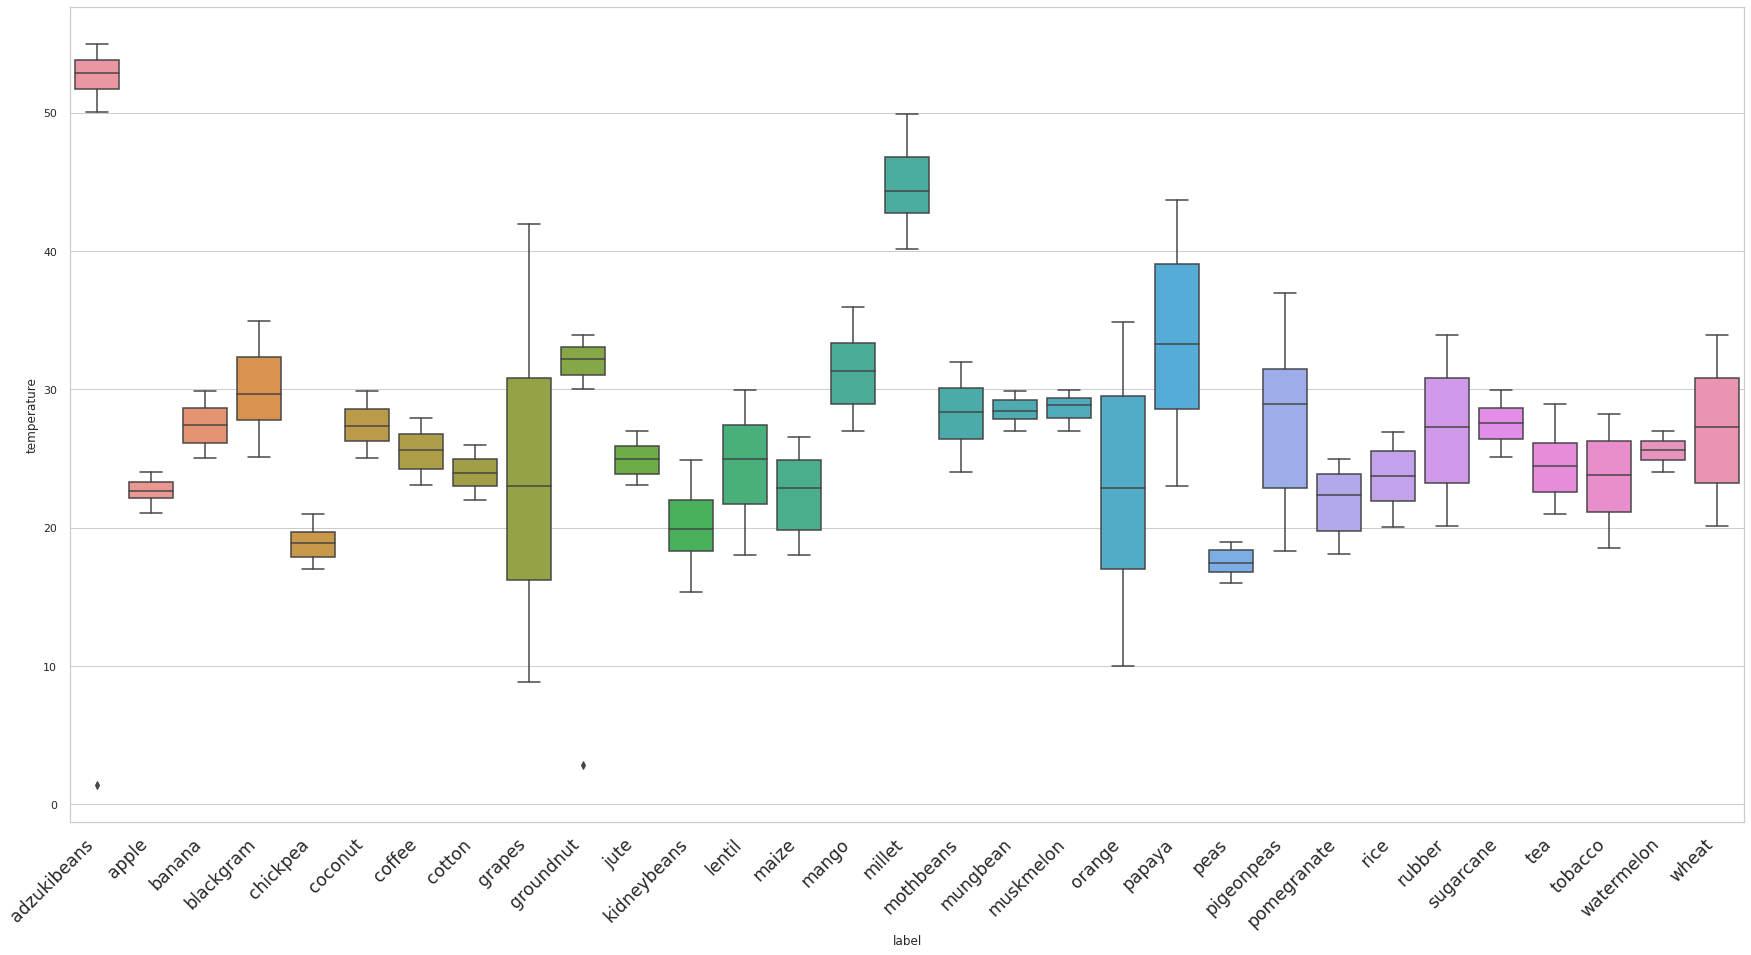

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='temperature',data=crops_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.savefig('Box Plot for Temperature measured in Degree Celsius.tiff', dpi=300)
None

**Humidity**

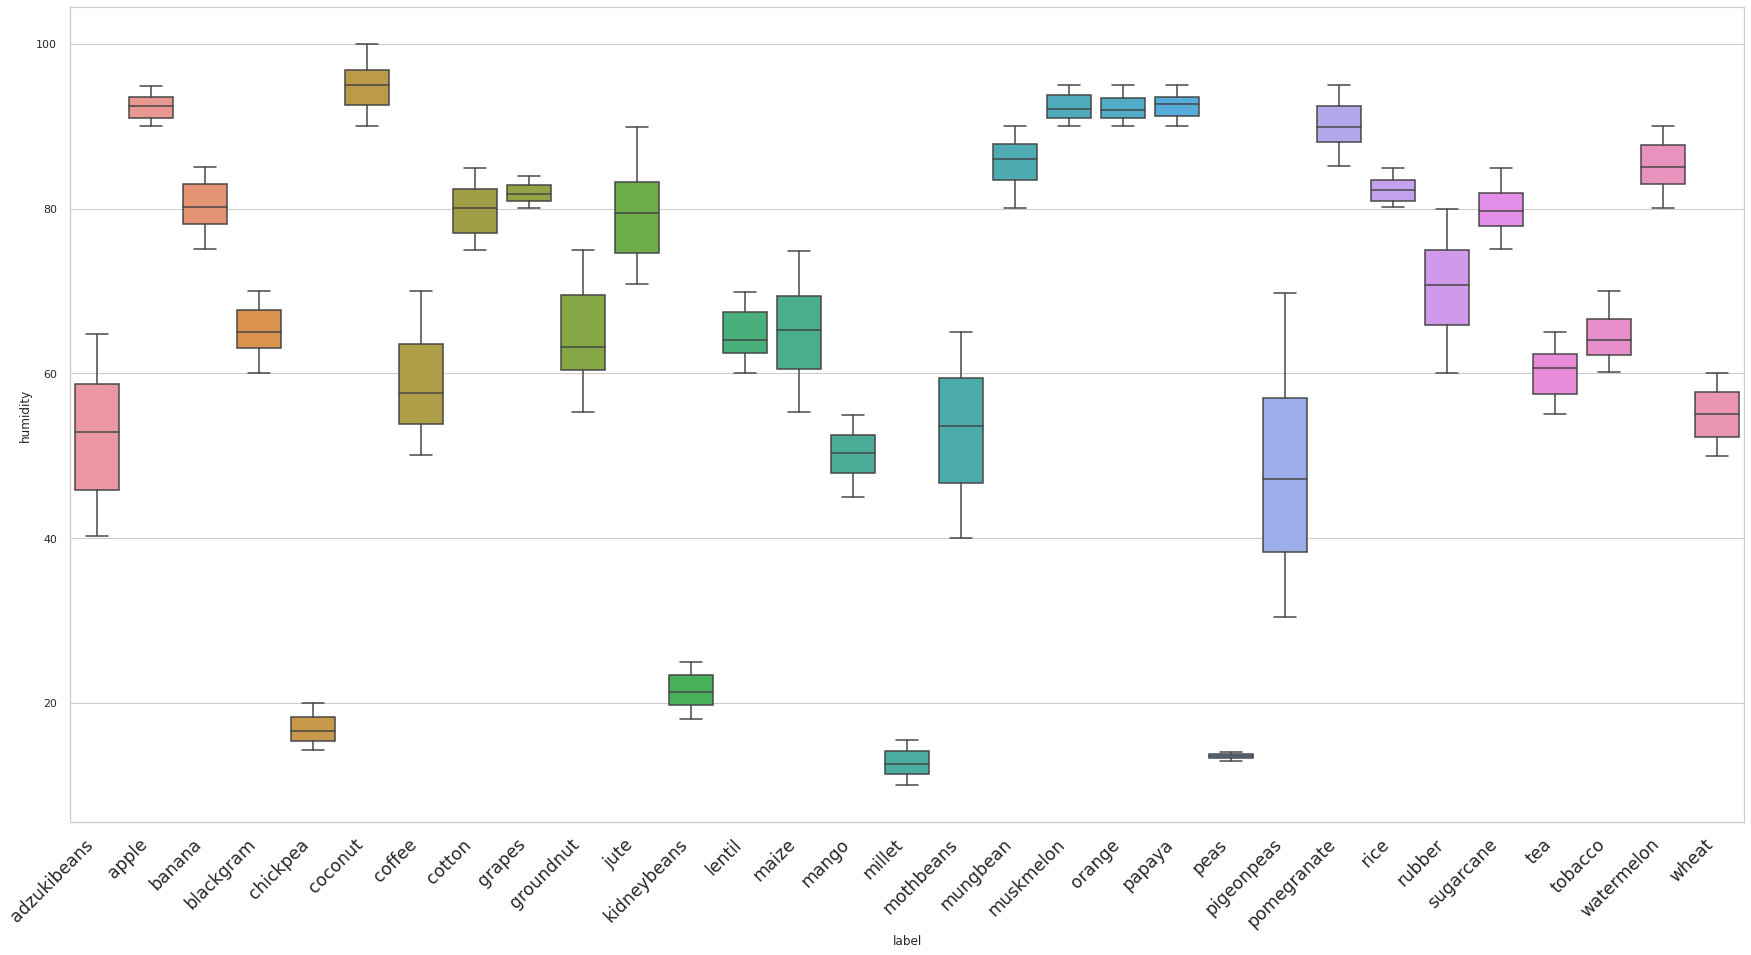

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='humidity',data=crops_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.savefig('Box Plot for Relative Humdity measured in % .tiff', dpi=300)
None

**PH**

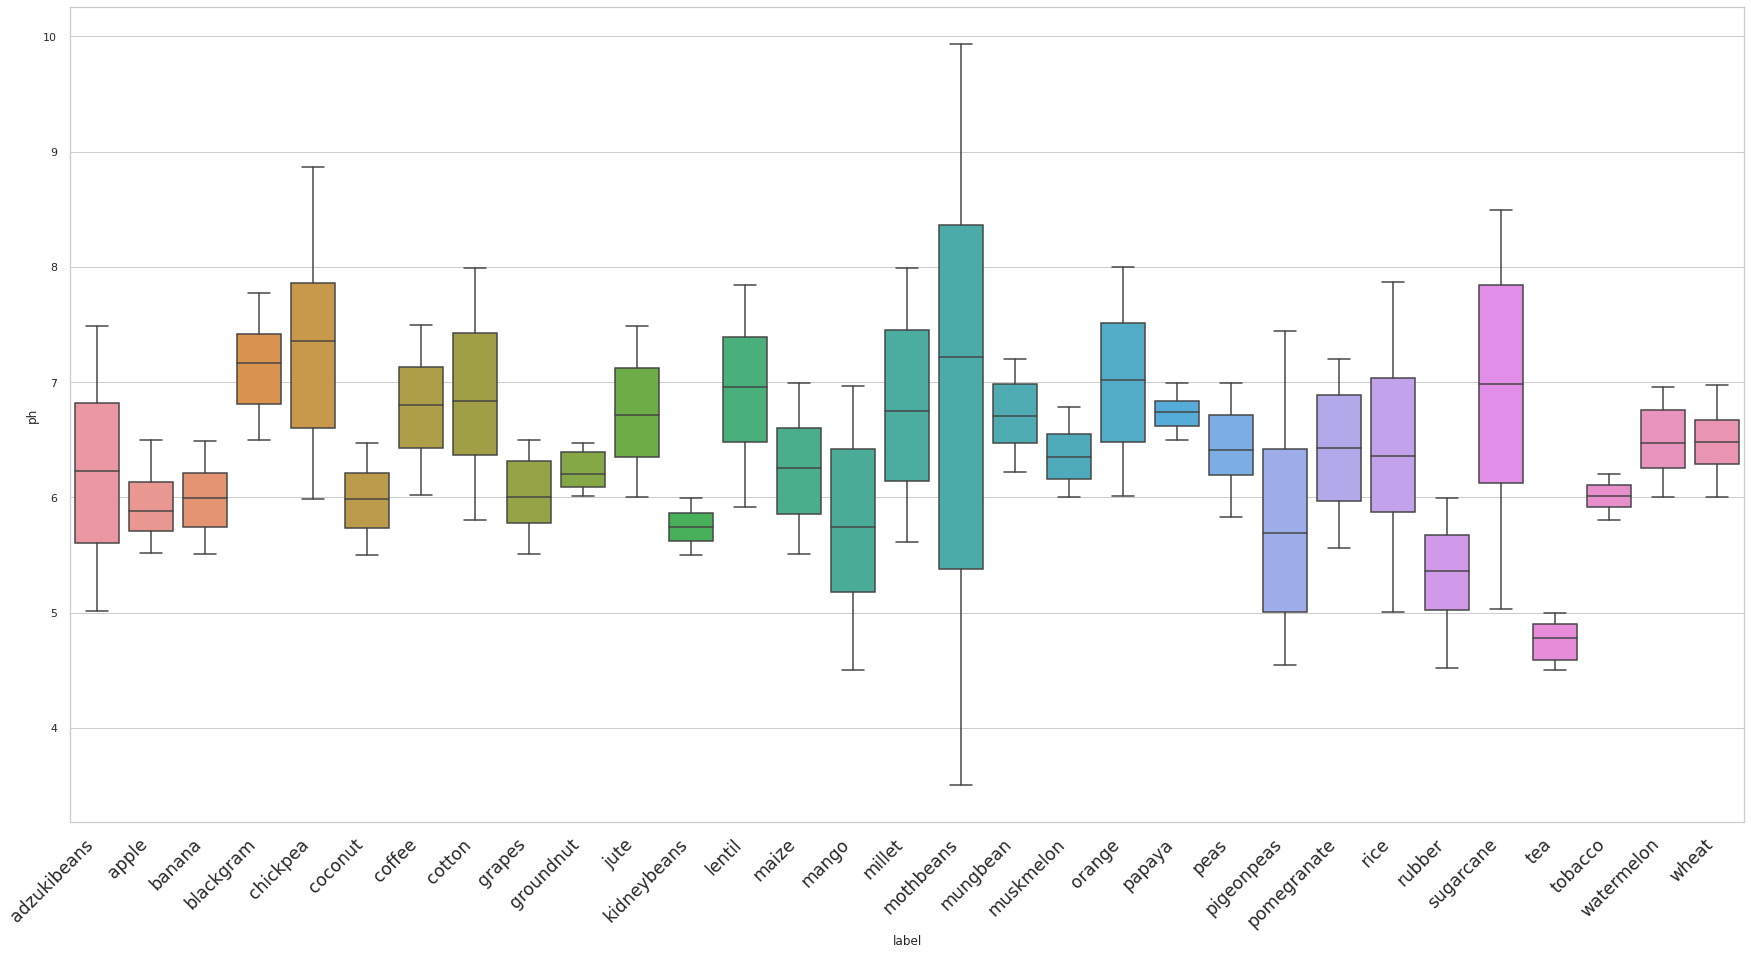

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='ph',data=crops_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.savefig('Box Plot for Ph levels in the soil.tiff', dpi=300)
None

**Rainfall**

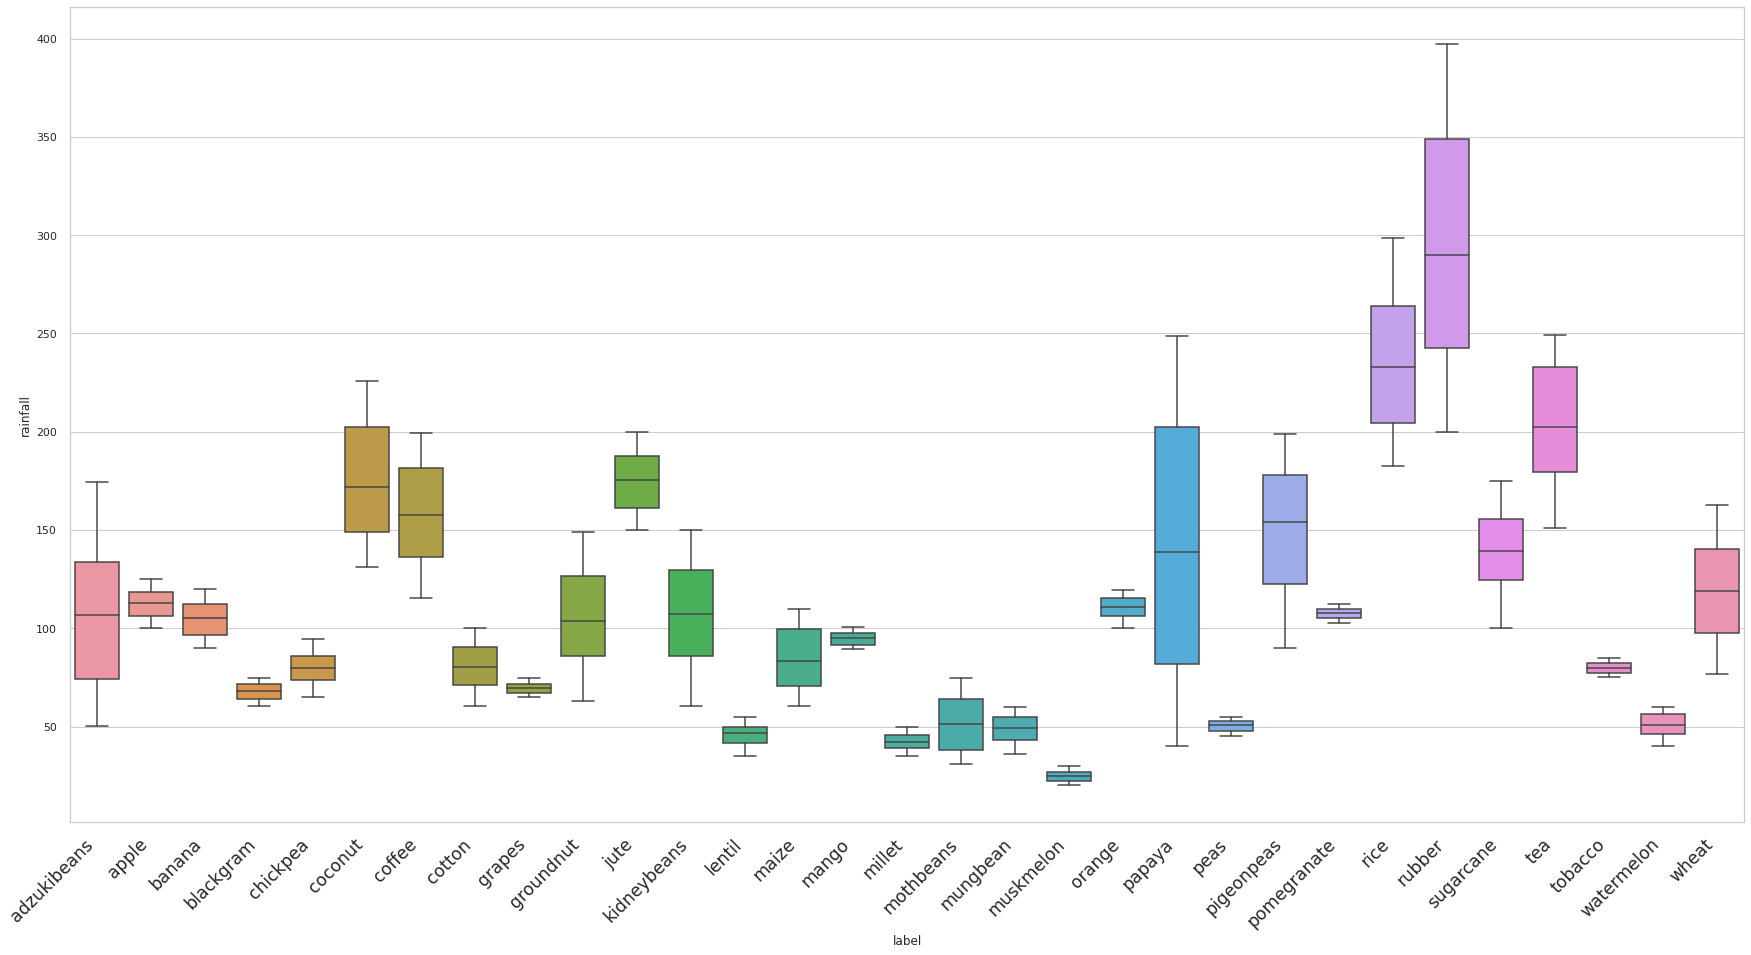

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='rainfall',data=crops_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.savefig('Box Plot for Rainfall measured in mm .tiff', dpi=300)
None


**Scatter plots for all the Crops to find the underlying trends**

**Nitrogen**

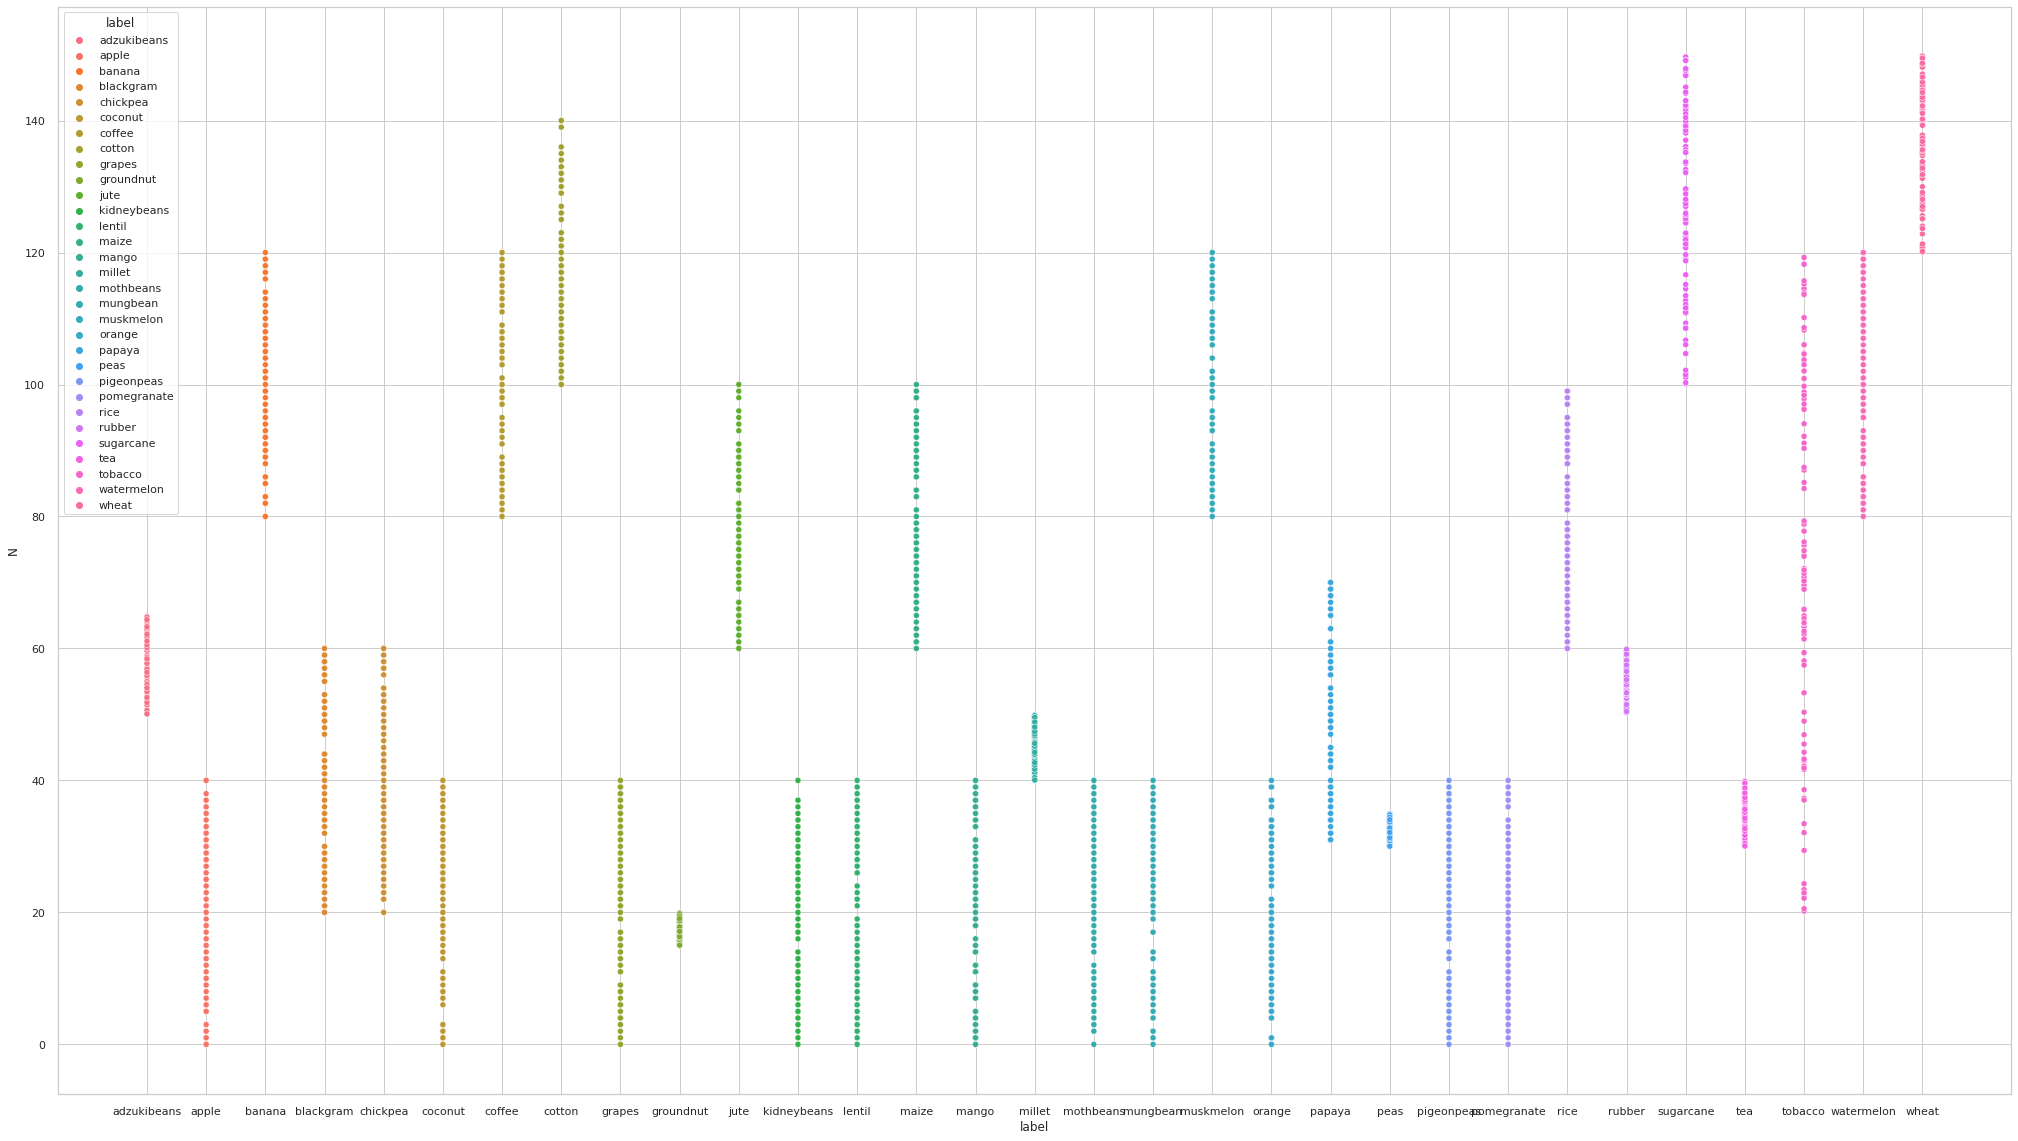

In [ ]:
fig, ax = plt.subplots(figsize=(35, 20))
sns.scatterplot(  y ='N' ,x='label', data=crops_df , hue='label', ax=ax)
sns.move_legend(ax, "upper left")
plt.savefig('A Scatter plot to depict the range of nitrogen content required in the soil by each crop.tiff', dpi=300)
plt.show()



**Phosphorus**

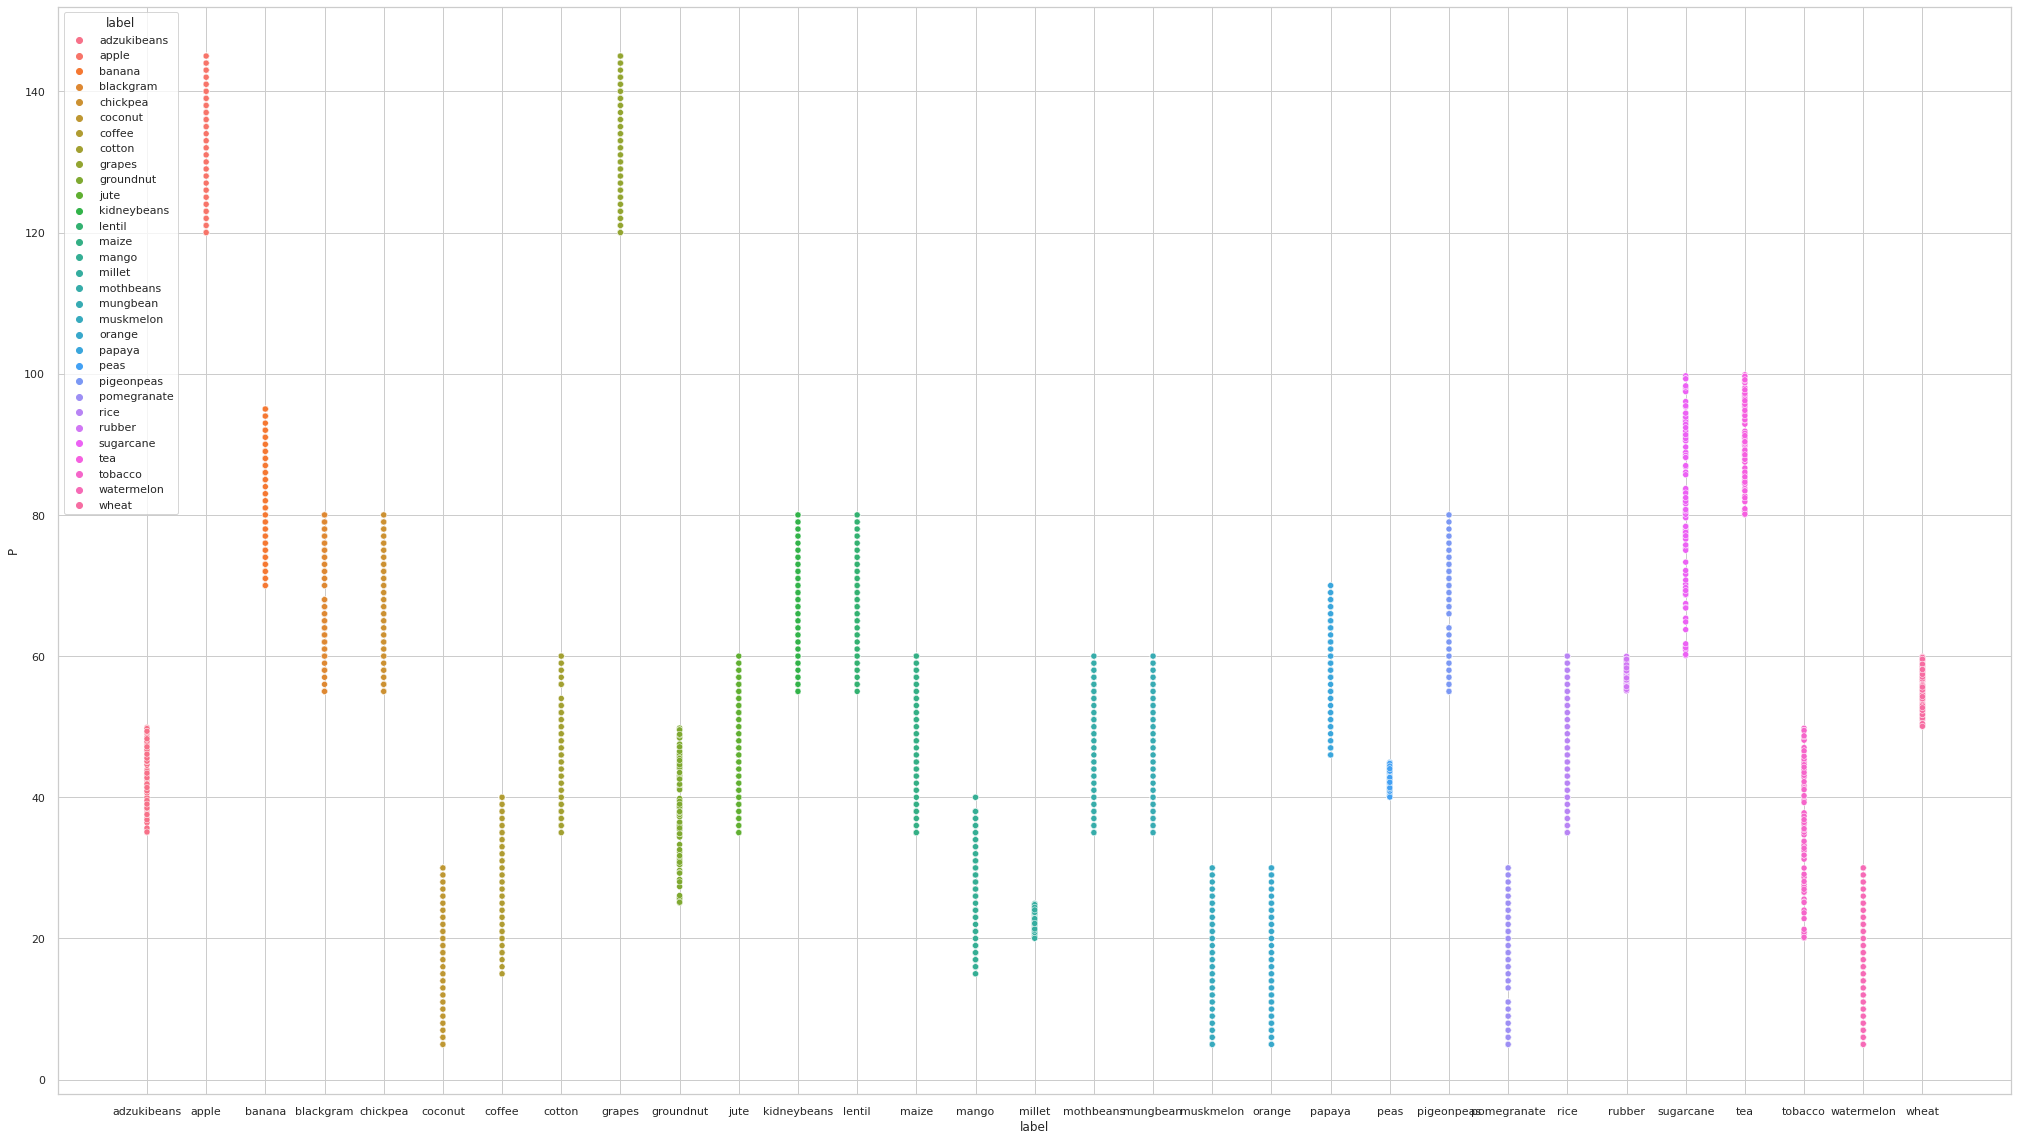

In [ ]:
fig, ax = plt.subplots(figsize=(35, 20))
sns.scatterplot(  y ='P' ,x='label', data=crops_df , hue='label',ax=ax)
sns.move_legend(ax, "upper left")
plt.savefig('A Scatter plot to depict the range of phosphorus content required in the soil by each crop.tiff', dpi=300)
plt.show()


**Potassium**

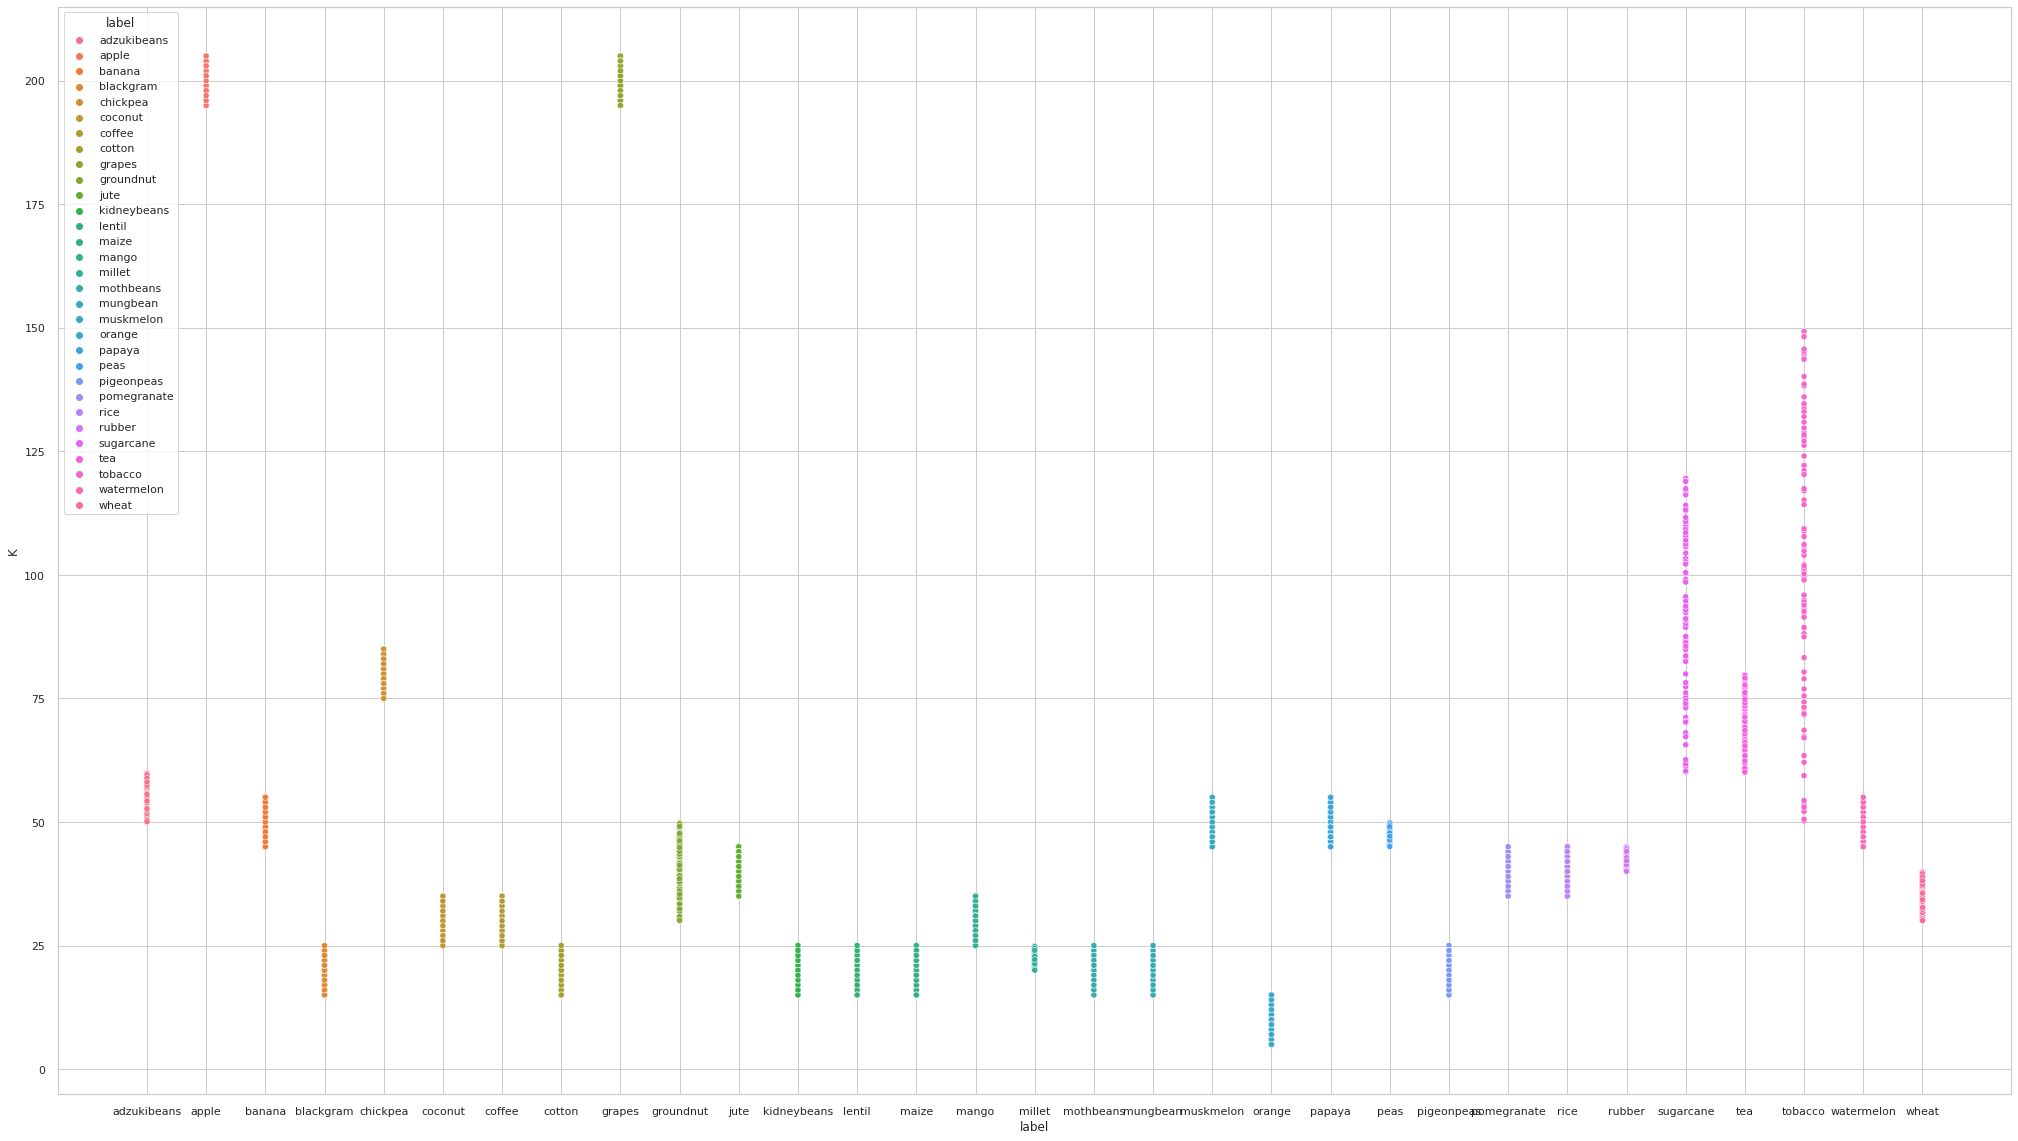

In [ ]:
fig, ax = plt.subplots(figsize=(35, 20))
sns.scatterplot(  y ='K' ,x='label', data=crops_df , hue='label',ax=ax)
sns.move_legend(ax, "upper left")
plt.savefig('A Scatter plot to depict the range of potassium content required in the soil by each crop.tiff', dpi=300)
plt.show()


**Temperature**

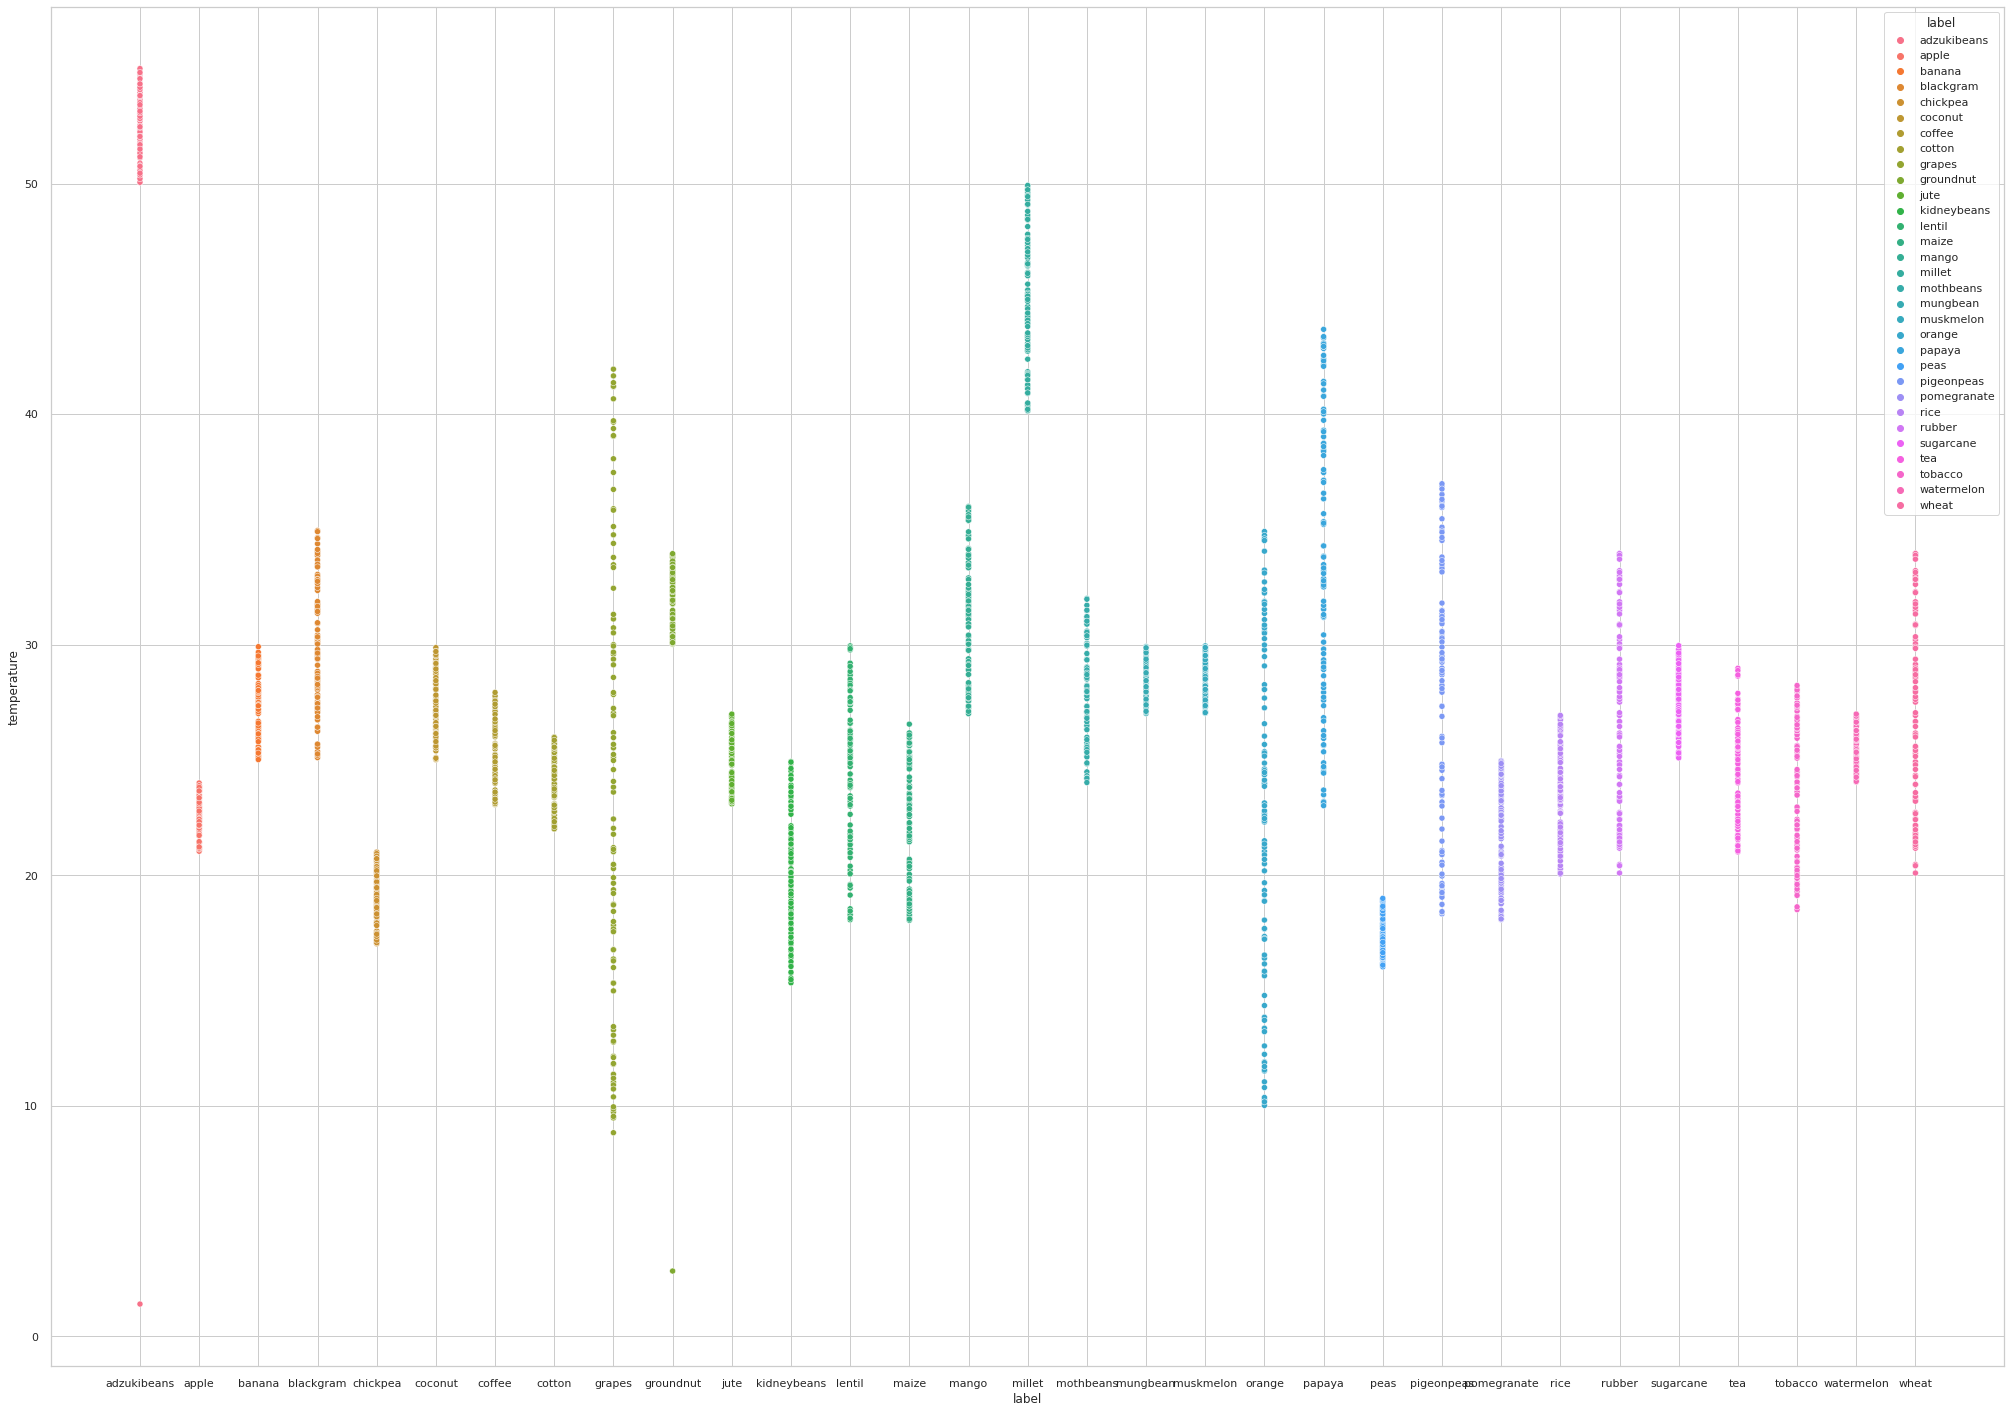

In [ ]:
fig, ax = plt.subplots(figsize=(35, 25))
sns.scatterplot(  y ='temperature' ,x='label', data=crops_df , hue='label',ax=ax)
sns.move_legend(ax, "upper right")
plt.savefig('A Scatter plot to depict the range of temperatures required by each crop.tiff', dpi=300)
plt.show()


**Humidity**

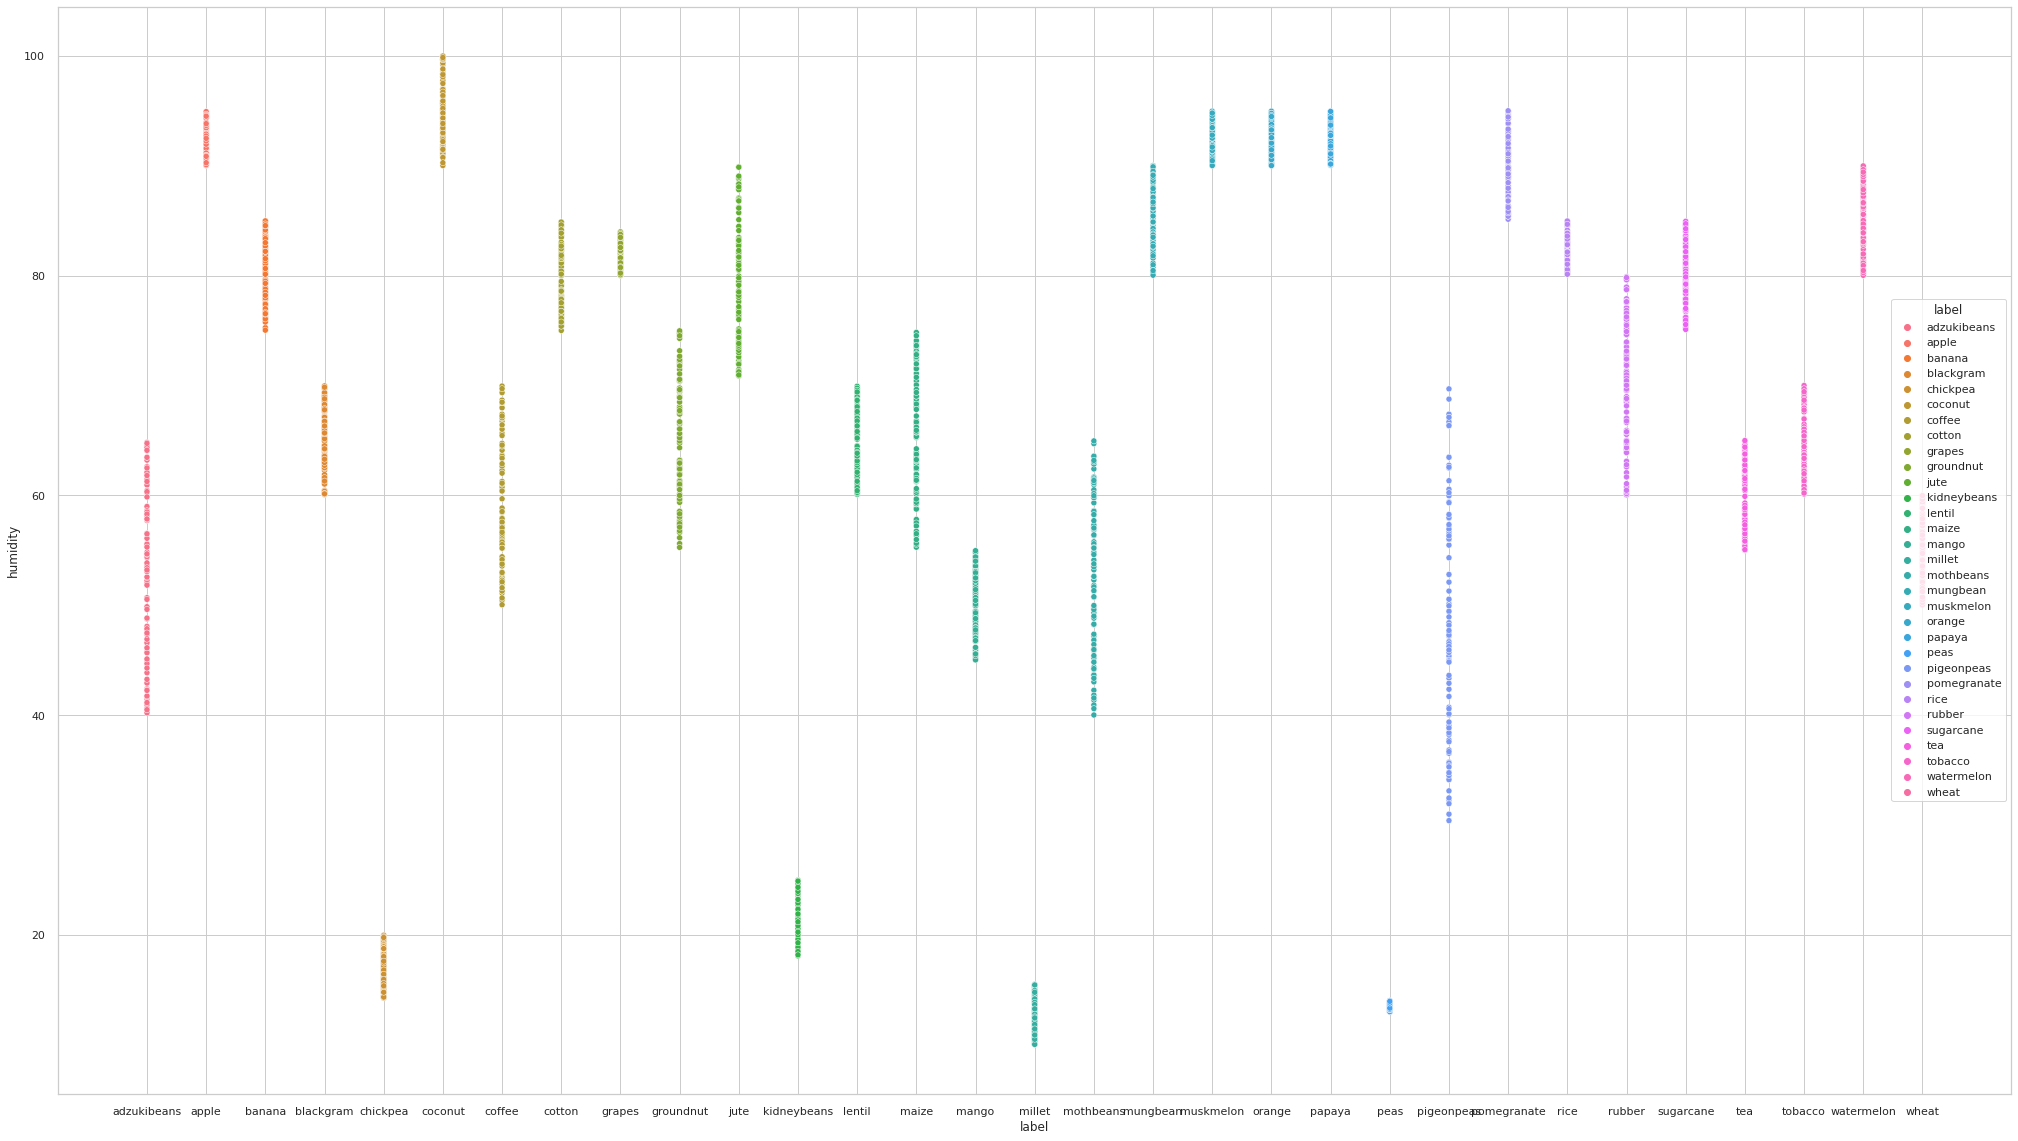

In [ ]:
fig, ax = plt.subplots(figsize=(35, 20))
sns.scatterplot(  y ='humidity' ,x='label', data=crops_df , hue='label',ax=ax)
sns.move_legend(ax, "center right")
plt.savefig('A Scatter plot to depict the range of humidity required by each crop.tiff', dpi=300)
plt.show()


**PH**

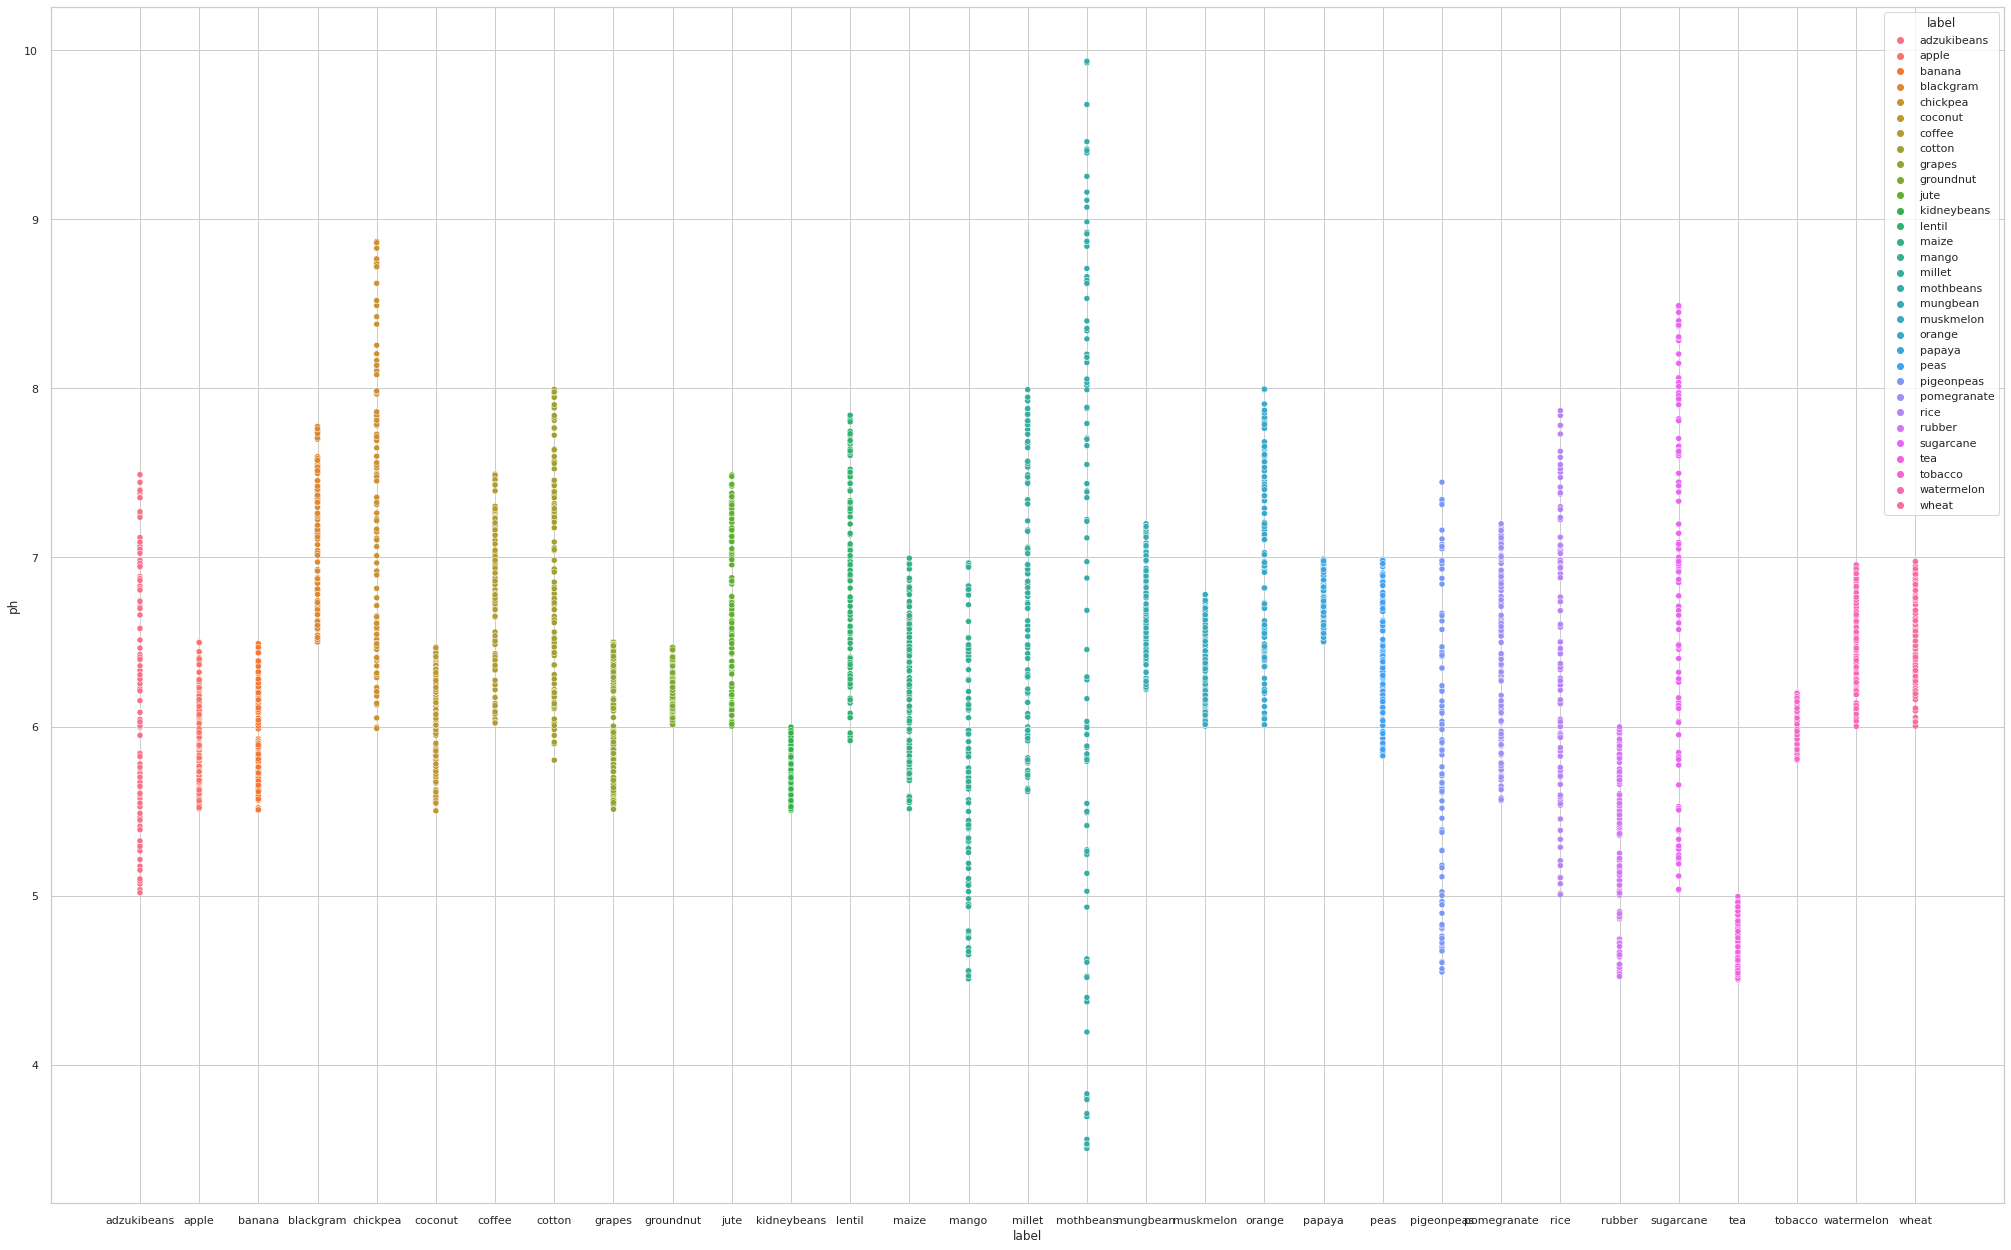

In [ ]:
fig, ax = plt.subplots(figsize=(35, 22))
sns.scatterplot(  y ='ph' ,x='label', data=crops_df , hue='label',ax=ax)
sns.move_legend(ax, "upper right")
plt.savefig('A Scatter plot to depict the range of pH levels required in the soil by each crop..tiff', dpi=300)
plt.show()


**Rainfall**

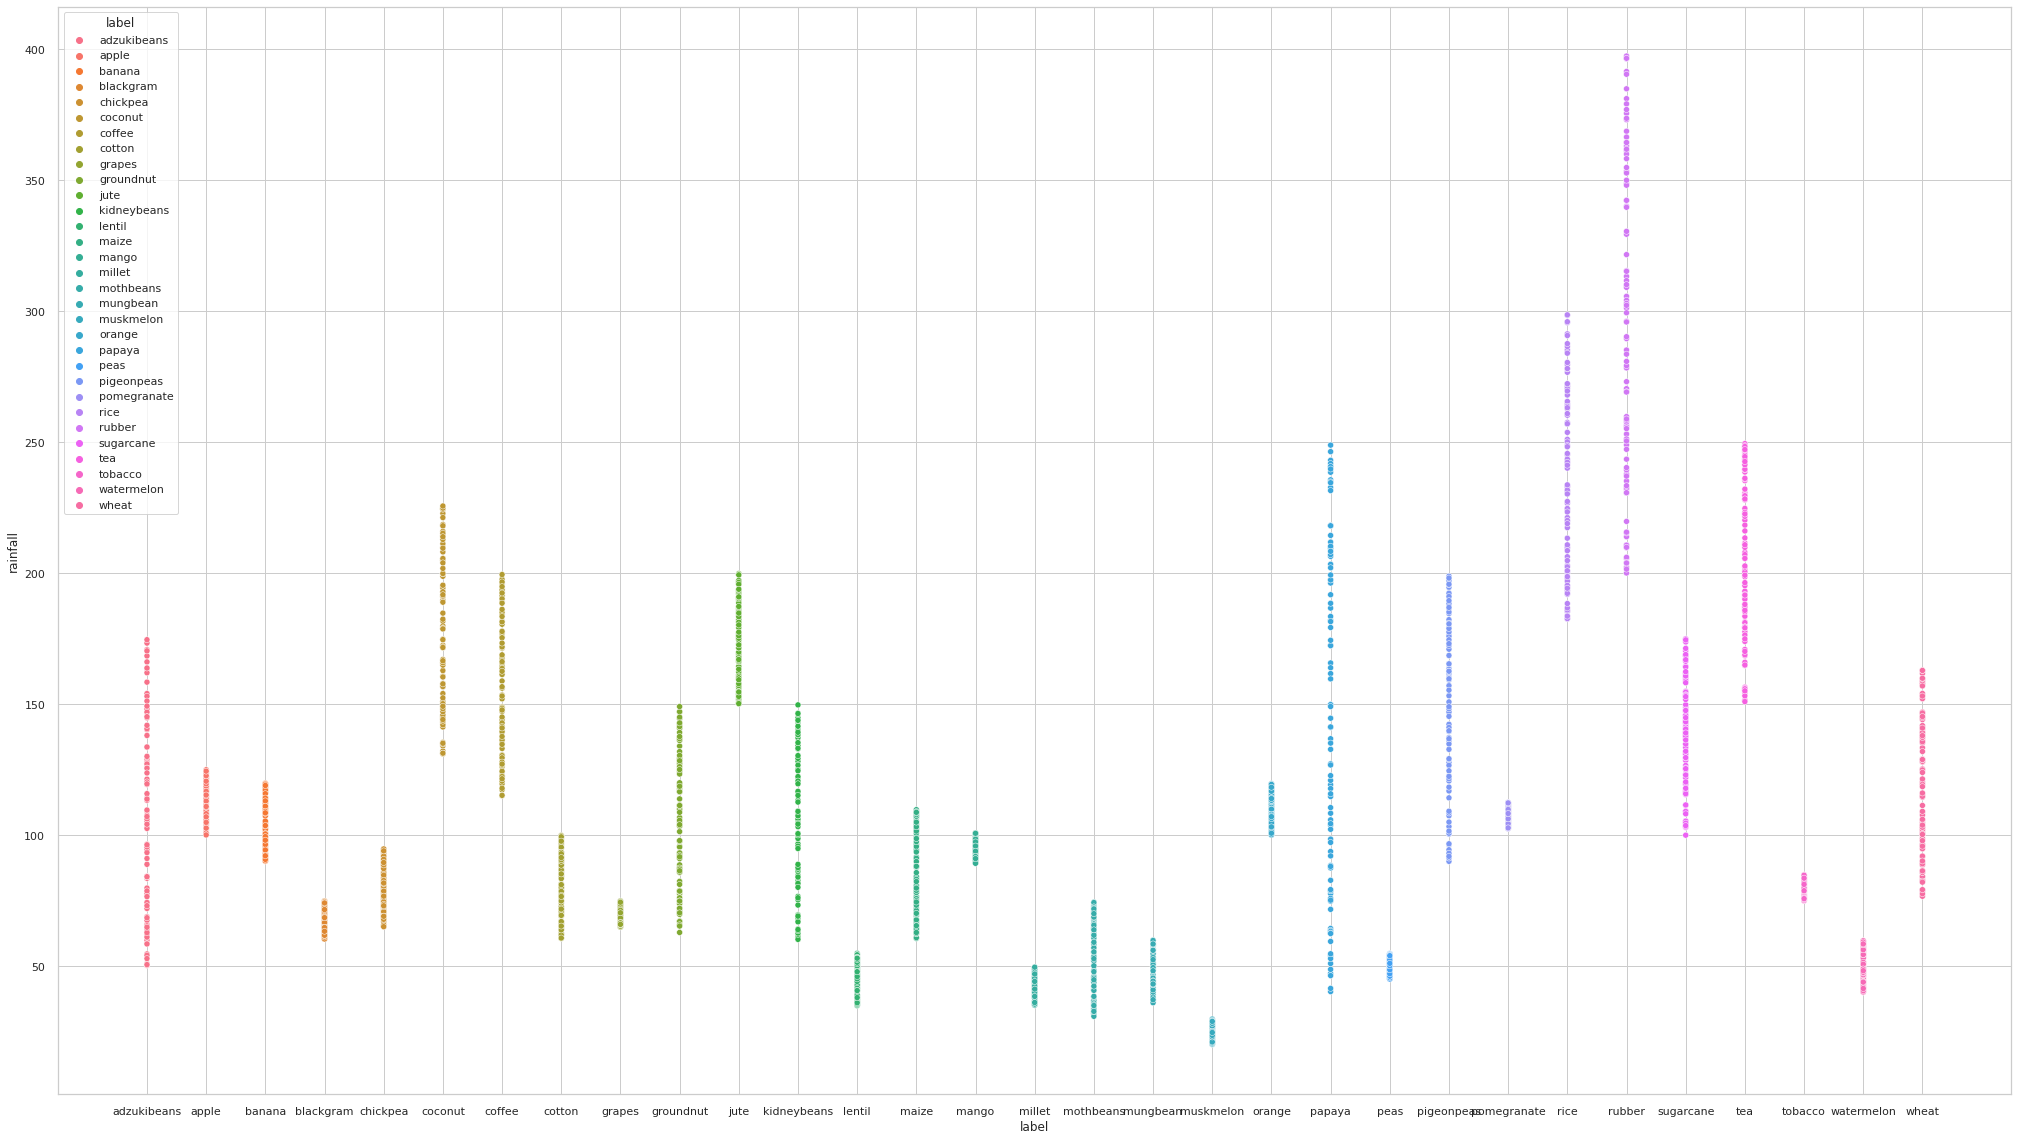

In [ ]:
fig, ax = plt.subplots(figsize=(35, 20))
sns.scatterplot(  y ='rainfall' ,x='label', data=crops_df , hue='label',ax=ax)
sns.move_legend(ax, "upper left")
plt.savefig('A Scatter plot to depict the ranges of rainfall required by each crop.tiff', dpi=300)
plt.show()


# **FEATURE SELECTION**

In [ ]:
features=crops_df[['N', 'P', 'K', 'temperature','humidity','ph', 'rainfall']]
target=crops_df['label']
print(target)
print(features)

0       adzukibeans
1       adzukibeans
2       adzukibeans
3       adzukibeans
4       adzukibeans
           ...     
3095          wheat
3096          wheat
3097          wheat
3098          wheat
3099          wheat
Name: label, Length: 3100, dtype: object
           N      P      K  temperature   humidity        ph    rainfall
0      52.02  37.02  51.34     1.395179  46.579188  6.332919  105.272329
1      62.71  47.71  58.47    51.750697  54.662403  6.511772  166.146187
2      61.46  46.46  57.64    53.017400  49.864205  5.299104   65.959049
3      53.83  38.83  52.55    53.211092  61.440867  5.322864   64.152838
4      57.43  42.43  54.95    50.875089  52.118891  7.377994  163.452682
...      ...    ...    ...          ...        ...       ...         ...
3095  142.22  57.41  37.41    27.940203  58.043508  6.761467  103.060114
3096  144.27  58.09  38.09    25.587474  53.567361  6.506046  156.966318
3097  135.56  55.19  35.19    21.967909  55.480668  6.109297  103.879627
3098  136

In [ ]:
label_codes=pd.Categorical(crops_df['label']).codes
print(label_codes)

[ 0  0  0 ... 30 30 30]


In [ ]:
label_names= crops_df.label.unique()
print(label_names)

['adzukibeans' 'apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee'
 'cotton' 'grapes' 'groundnut' 'jute' 'kidneybeans' 'lentil' 'maize'
 'mango' 'millet' 'mothbeans' 'mungbean' 'muskmelon' 'orange' 'papaya'
 'peas' 'pigeonpeas' 'pomegranate' 'rice' 'rubber' 'sugarcane' 'tea'
 'tobacco' 'watermelon' 'wheat']


# **TRAIN TEST SPLIT**

In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)


In [ ]:
import sklearn

print(sklearn.__version__)

1.0.2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

X_train,X_test,Y_train,Y_test = train_test_split(features,target, test_size=0.3, random_state=42)

In [ ]:
model=[]
accuracy=[]
recall=[]
precision=[]
f1_scores=[]


# **MODEL FITTING**

# **NAIVE BAYES CLASSIFIER**

**Importing the Libraries**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
crops_NB = GaussianNB()

**Training the model**

In [ ]:
crops_NB.fit(X_train, Y_train)

GaussianNB()

**Testing the Model**

In [ ]:
Y_predict=crops_NB.predict(X_test)

**Finding the Accuracy of the Model**

In [ ]:
NB_accuracy= accuracy_score(Y_test, Y_predict)
print(NB_accuracy)

0.9913978494623656


**Finding the Precision of the Model**

In [ ]:
NB_precision = precision_score(Y_test, Y_predict, average='macro')
print(NB_precision)

0.9922393003269155


**Finding the Recall of the Model**

In [ ]:
NB_recall = recall_score(Y_test, Y_predict, average='macro')
print(NB_recall)

0.9913280724476171


**Finding the F1 Score of the Model**

In [ ]:
NB_f1_score = f1_score(Y_test, Y_predict, average='macro')
print(NB_f1_score)

0.9915959224217448


In [ ]:
model.append("Naive Bayes")
accuracy.append(NB_accuracy)
precision.append(NB_precision)
recall.append(NB_recall)
f1_scores.append(NB_f1_score)

In [ ]:
NB_report=classification_report(Y_test, Y_predict)
print(NB_report)

              precision    recall  f1-score   support

 adzukibeans       1.00      0.96      0.98        27
       apple       1.00      1.00      1.00        36
      banana       1.00      1.00      1.00        40
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        38
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        28
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        31
   groundnut       1.00      0.96      0.98        24
        jute       0.89      0.97      0.93        34
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      1.00      1.00        32
       maize       1.00      0.96      0.98        28
       mango       1.00      1.00      1.00        28
      millet       1.00      1.00      1.00        22
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00    

**Plotting AUC-ROC Curve for Model**

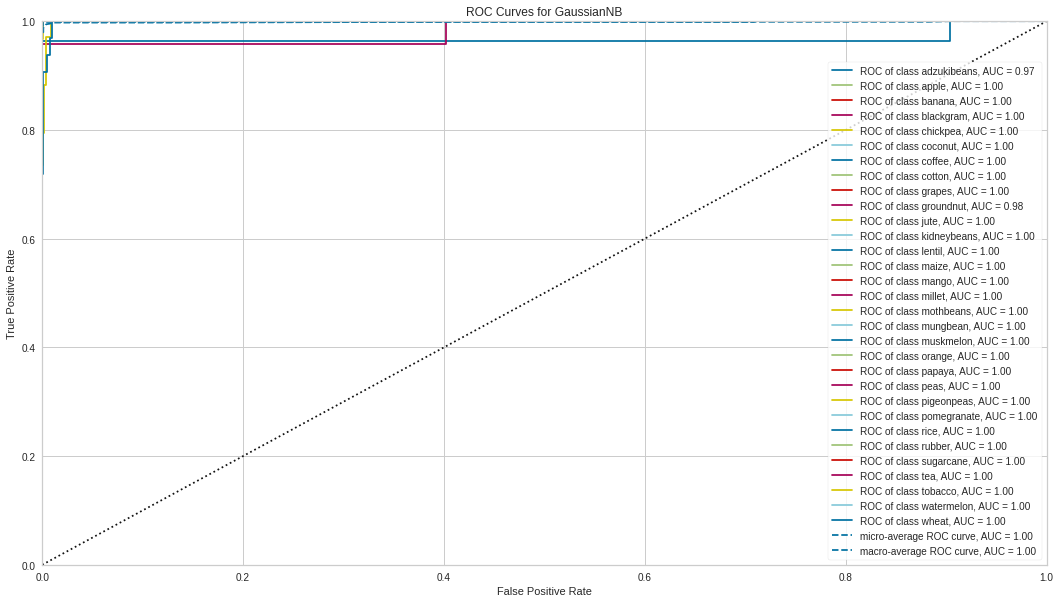

<Figure size 576x396 with 0 Axes>

In [ ]:
from yellowbrick.classifier.base import LabelEncoder
from yellowbrick.classifier import ROCAUC
encoder=LabelEncoder()

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=[ "adzukibeans", "apple","banana","blackgram", "chickpea", 'coconut',"coffee",
                                                "cotton","grapes","groundnut","jute","kidneybeans","lentil","maize","mango","millet",
                                                "mothbeans","mungbean","muskmelon","orange","papaya","peas","pigeonpeas","pomegranate",
                                                "rice","rubber","sugarcane","tea","tobacco","watermelon","wheat"],)
                                        
                                        
                                      
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()



    return visualizer


fig,ax = plt.subplots(figsize=(18,10))
plot_ROC_curve(crops_NB, X_train ,Y_train, X_test, Y_test) 
plt.savefig('ROC Curves for Naive Bayes.tiff', dpi=300) 
None  

**Plotting the Confusion Matrix for the Model**

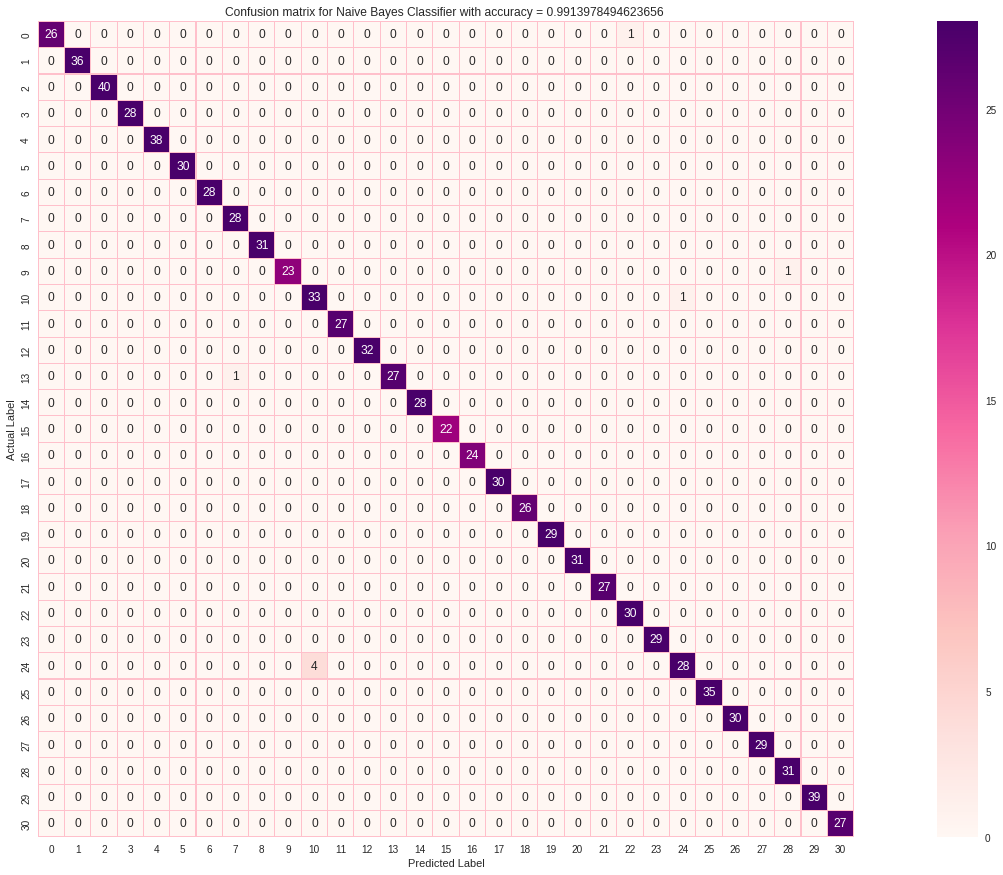

In [ ]:
cm_NB=confusion_matrix(Y_test, Y_predict)

fig, ax= plt.subplots(figsize=(30,15))
sns.heatmap(cm_NB, annot=True,robust=True, cmap='RdPu' ,linecolor='pink', linewidths=0.05, square=True, ax=ax )
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion matrix for Naive Bayes Classifier with accuracy = {} ". format(accuracy_score(Y_test, Y_predict)))
plt.savefig('Confusion matrix for Naive Bayes Classifier.tiff', dpi=300)
plt.show()

# **K-Nearest Neighbour (KNN)**

**Importing the Libraries**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
crops_KNN=KNeighborsClassifier()

**Training the model**

In [ ]:
crops_KNN.fit(X_train,Y_train)

KNeighborsClassifier()

**Testing the Model**

In [ ]:
Y_predict=crops_KNN.predict(X_test)

**Finding the Accuracy of the Model**

In [ ]:
KNN_accuracy= accuracy_score(Y_test, Y_predict)
print(KNN_accuracy)

0.978494623655914


**Finding the Precision of the Model**

In [ ]:
KNN_precision = precision_score(Y_test,Y_predict, average='macro')
print(KNN_precision)

0.9801777075970624


**Finding the Recall of the Model**

In [ ]:
KNN_recall = recall_score(Y_test, Y_predict, average='macro')
print(KNN_recall)

0.9782057267351384


**Finding the F1 Score of the Model**

In [ ]:
KNN_f1_score = f1_score(Y_test, Y_predict, average='macro')
print(KNN_f1_score)

0.9782793925425552


In [ ]:
model.append("K Nearest Neighbours")
accuracy.append(KNN_accuracy)
precision.append(KNN_precision)
recall.append(KNN_recall)
f1_scores.append(KNN_f1_score)

In [ ]:
KNN_report=classification_report(Y_test, Y_predict)
print(KNN_report)

              precision    recall  f1-score   support

 adzukibeans       1.00      0.96      0.98        27
       apple       1.00      1.00      1.00        36
      banana       1.00      1.00      1.00        40
   blackgram       0.93      1.00      0.97        28
    chickpea       1.00      1.00      1.00        38
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        28
      cotton       0.93      1.00      0.97        28
      grapes       1.00      1.00      1.00        31
   groundnut       1.00      0.96      0.98        24
        jute       0.82      0.94      0.88        34
 kidneybeans       0.90      1.00      0.95        27
      lentil       0.97      1.00      0.98        32
       maize       1.00      0.93      0.96        28
       mango       0.93      1.00      0.97        28
      millet       1.00      1.00      1.00        22
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00    

**Plotting AUC-ROC Curve for Model**

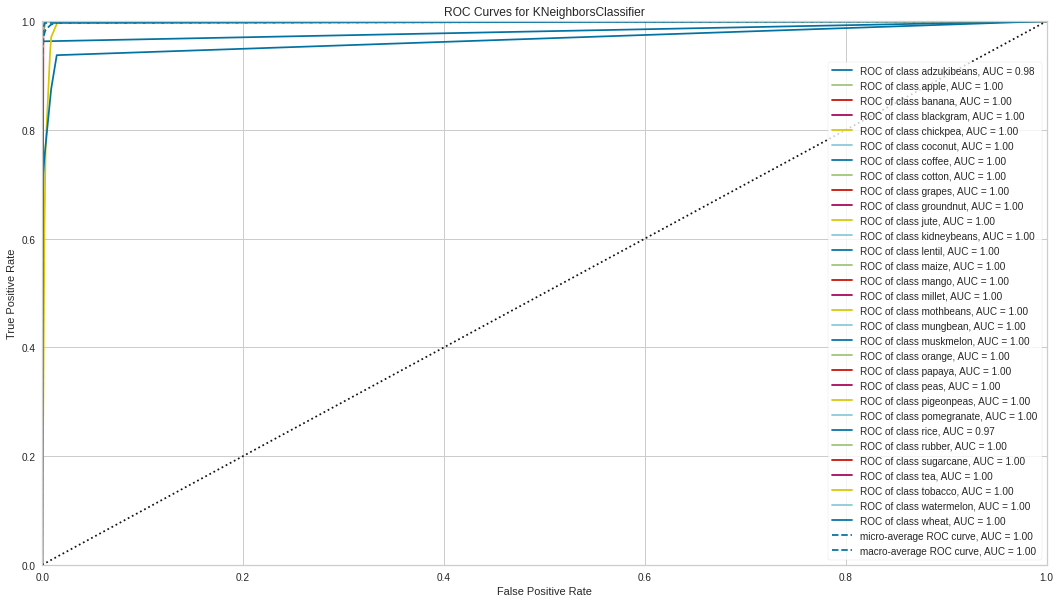

<Figure size 576x396 with 0 Axes>

In [ ]:
from yellowbrick.classifier.base import LabelEncoder
from yellowbrick.classifier import ROCAUC
encoder=LabelEncoder()

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=[ "adzukibeans", "apple","banana","blackgram", "chickpea", 'coconut',"coffee",
                                                "cotton","grapes","groundnut","jute","kidneybeans","lentil","maize","mango","millet",
                                                "mothbeans","mungbean","muskmelon","orange","papaya","peas","pigeonpeas","pomegranate",
                                                "rice","rubber","sugarcane","tea","tobacco","watermelon","wheat"],)
                                        
                                        
                                      
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()



    return visualizer


fig,ax = plt.subplots(figsize=(18,10))
plot_ROC_curve(crops_KNN, X_train ,Y_train, X_test, Y_test) 
plt.savefig('ROC Curves for K-Nearest Neighbours.tiff', dpi=300)
plt.show() 
None  

**Plotting the Confusion Matrix for the Model**

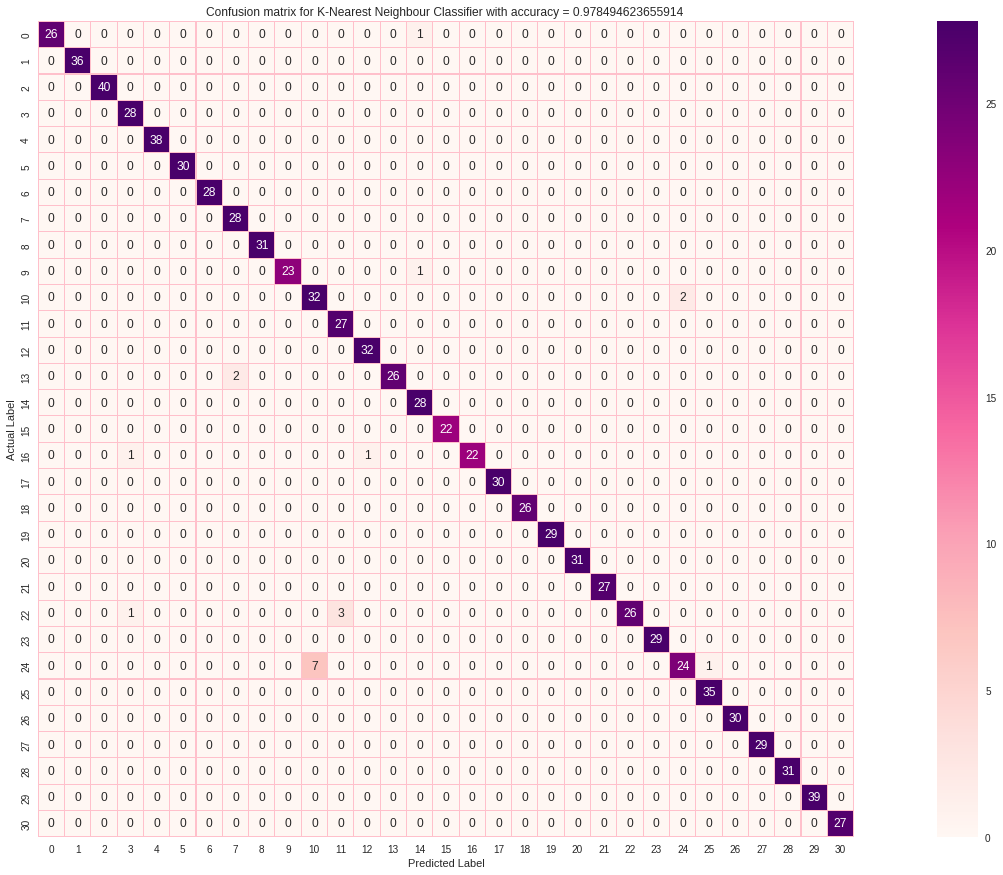

In [ ]:
cm_KNN=confusion_matrix(Y_test, Y_predict)

fig, ax= plt.subplots(figsize=(30,15))
sns.heatmap(cm_KNN, annot=True,robust=True, cmap='RdPu' ,linecolor='pink', linewidths=0.05, square=True, ax=ax )
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion matrix for K-Nearest Neighbour Classifier with accuracy = {} ". format(accuracy_score(Y_test, Y_predict)))
plt.savefig('Confusion matrix for K-Nearest Neighbour Classifier.tiff', dpi=300)
plt.show()

# **LOGISTIC REGRESSION CLASSIFIER**

**Importing the Libraries**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
crops_LG= LogisticRegression()

**Training the model**

In [ ]:
crops_LG .fit(X_train,Y_train)

LogisticRegression()

**Testing the Model**

In [ ]:
Y_predict=crops_LG .predict(X_test)

**Finding the Accuracy of the Model**

In [ ]:
Logistic_accuracy= accuracy_score(Y_test, Y_predict)
print(Logistic_accuracy)

0.9580645161290322


**Finding the Precision of the Model**

In [ ]:
LG_precision = precision_score(Y_test, Y_predict, average='macro')
print(LG_precision)

0.9579361156533373


**Finding the Recall of the Model**

In [ ]:
LG_recall = recall_score(Y_test, Y_predict, average='macro')
print(LG_recall)

0.9563026809174358


**Finding the F1 Score of the Model**

In [ ]:
LG_f1_score = f1_score(Y_test, Y_predict, average='macro')
print(LG_f1_score)

0.9562013743606357


In [ ]:
model.append("Logistic Regression")
accuracy.append(Logistic_accuracy)
precision.append(LG_precision)
recall.append(LG_recall)
f1_scores.append(LG_f1_score)

In [ ]:
LG_report=classification_report(Y_test, Y_predict)
print(LG_report)

              precision    recall  f1-score   support

 adzukibeans       1.00      0.96      0.98        27
       apple       1.00      1.00      1.00        36
      banana       1.00      1.00      1.00        40
   blackgram       0.80      0.86      0.83        28
    chickpea       1.00      1.00      1.00        38
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        28
      cotton       0.88      1.00      0.93        28
      grapes       1.00      1.00      1.00        31
   groundnut       0.92      0.92      0.92        24
        jute       0.75      0.88      0.81        34
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      0.97      0.98        32
       maize       0.96      0.86      0.91        28
       mango       0.96      0.96      0.96        28
      millet       1.00      1.00      1.00        22
   mothbeans       0.71      0.71      0.71        24
    mungbean       0.94    

**Plotting AUC-ROC Curve for Model**

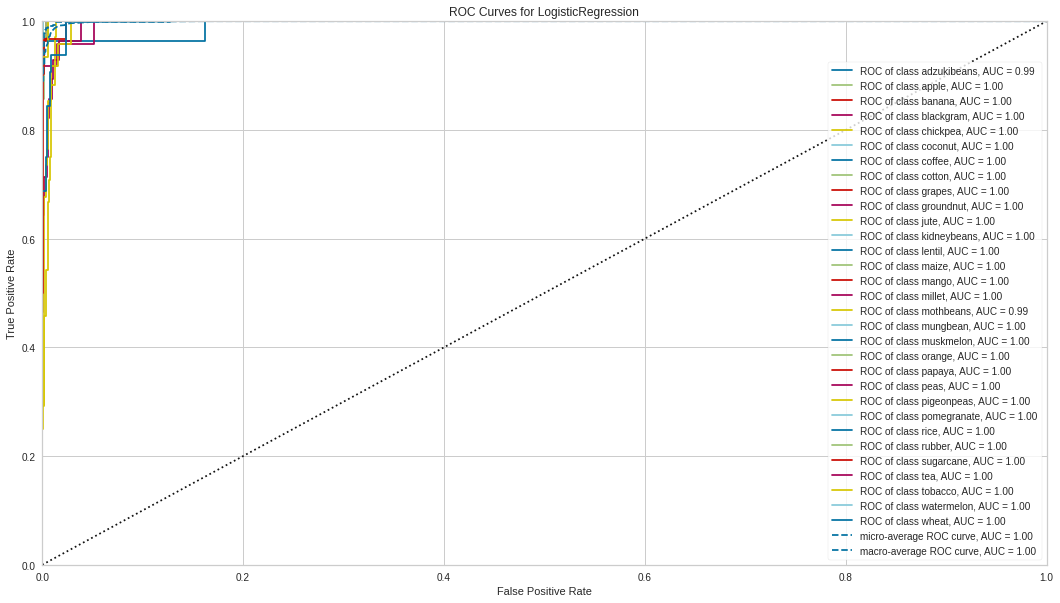

<Figure size 576x396 with 0 Axes>

In [ ]:
from yellowbrick.classifier.base import LabelEncoder
from yellowbrick.classifier import ROCAUC
encoder=LabelEncoder()

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=[ "adzukibeans", "apple","banana","blackgram", "chickpea", 'coconut',"coffee",
                                                "cotton","grapes","groundnut","jute","kidneybeans","lentil","maize","mango","millet",
                                                "mothbeans","mungbean","muskmelon","orange","papaya","peas","pigeonpeas","pomegranate",
                                                "rice","rubber","sugarcane","tea","tobacco","watermelon","wheat"],)
                                        
                                        
                                      
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer


fig,ax = plt.subplots(figsize=(18,10))
plot_ROC_curve(crops_LG, X_train ,Y_train, X_test, Y_test) 
plt.savefig('ROC Curves for Logistic Regression.tiff', dpi=300) 
None  

**Plotting the Confusion Matrix for the Model**

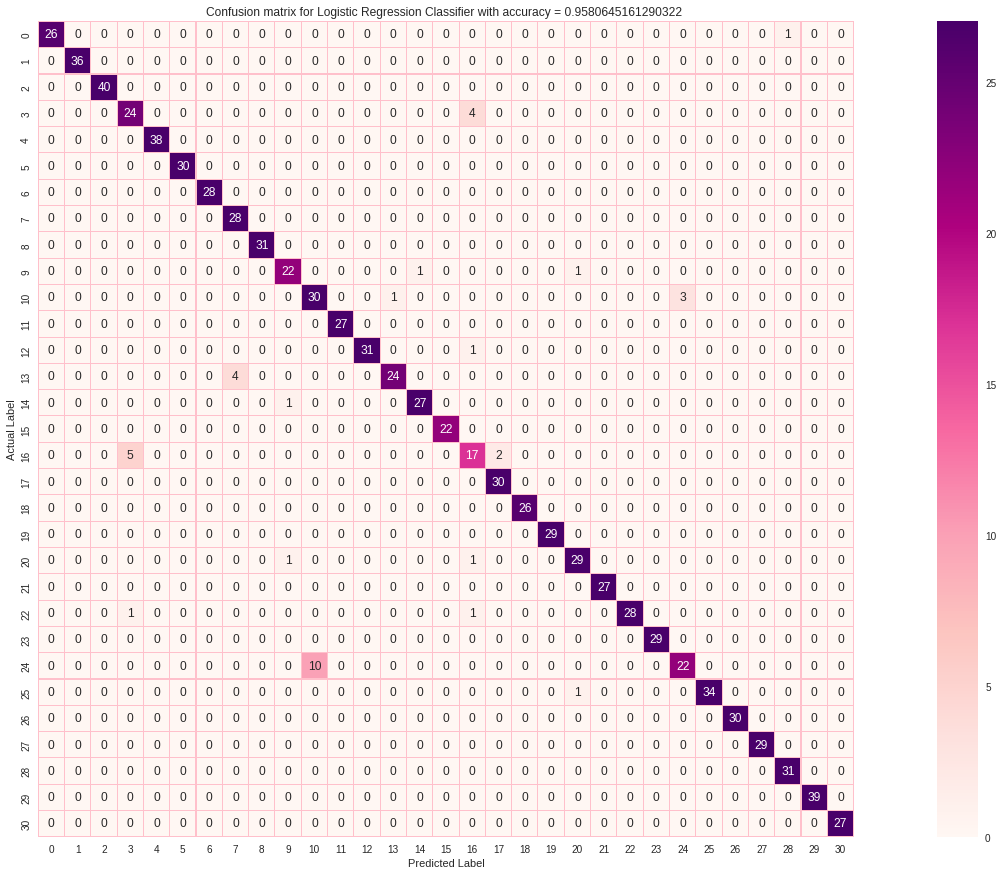

In [ ]:
cm_LG=confusion_matrix(Y_test, Y_predict)

fig, ax= plt.subplots(figsize=(30,15))
sns.heatmap(cm_LG, annot=True,robust=True, cmap='RdPu' ,linecolor='pink', linewidths=0.05, square=True, ax=ax )
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion matrix for Logistic Regression Classifier with accuracy = {} ". format(accuracy_score(Y_test, Y_predict)))
plt.savefig('Confusion matrix for Logistic Regression Classifier.tiff', dpi=300)
plt.show()

# **SVC (Support Vector Classifier)**

**Importing the Libraries**

In [ ]:
from sklearn import svm

In [ ]:
crops_SVC= svm.SVC(kernel='poly')

**Training the model**

In [ ]:
crops_SVC.fit(X_train,Y_train)

SVC(kernel='poly')

**Testing the model**

In [ ]:
Y_predict=crops_SVC.predict(X_test)

**Finding the Accuracy of the Model**

In [ ]:
SVC_accuracy=accuracy_score(Y_test, Y_predict)
SVC_accuracy

0.9741935483870968

**Finding the Precision of the Model**

In [ ]:
SVC_precision = precision_score(Y_test, Y_predict, average='macro')
print(SVC_precision)

0.9747668641216658


**Finding the Recall of the Model**

In [ ]:
SVC_recall = recall_score(Y_test, Y_predict, average='macro')
print(SVC_recall)

0.9741923419847763


**Finding the F1 Score of the Model**

In [ ]:
SVC_f1_score = f1_score(Y_test, Y_predict, average='macro')
print(SVC_f1_score)

0.9738447215769895


In [ ]:
model.append("Support Vector")
accuracy.append(SVC_accuracy)
precision.append(SVC_precision)
recall.append(SVC_recall)
f1_scores.append(SVC_f1_score)

In [ ]:
SVC_report=classification_report(Y_test, Y_predict)
print(SVC_report)

              precision    recall  f1-score   support

 adzukibeans       1.00      0.96      0.98        27
       apple       1.00      1.00      1.00        36
      banana       1.00      1.00      1.00        40
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        38
     coconut       1.00      1.00      1.00        30
      coffee       1.00      0.96      0.98        28
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        31
   groundnut       0.96      0.92      0.94        24
        jute       0.81      0.88      0.85        34
 kidneybeans       0.87      1.00      0.93        27
      lentil       0.97      0.97      0.97        32
       maize       1.00      0.96      0.98        28
       mango       0.93      1.00      0.97        28
      millet       1.00      1.00      1.00        22
   mothbeans       0.92      0.96      0.94        24
    mungbean       1.00    

**Plotting AUC-ROC Curve for the Model**

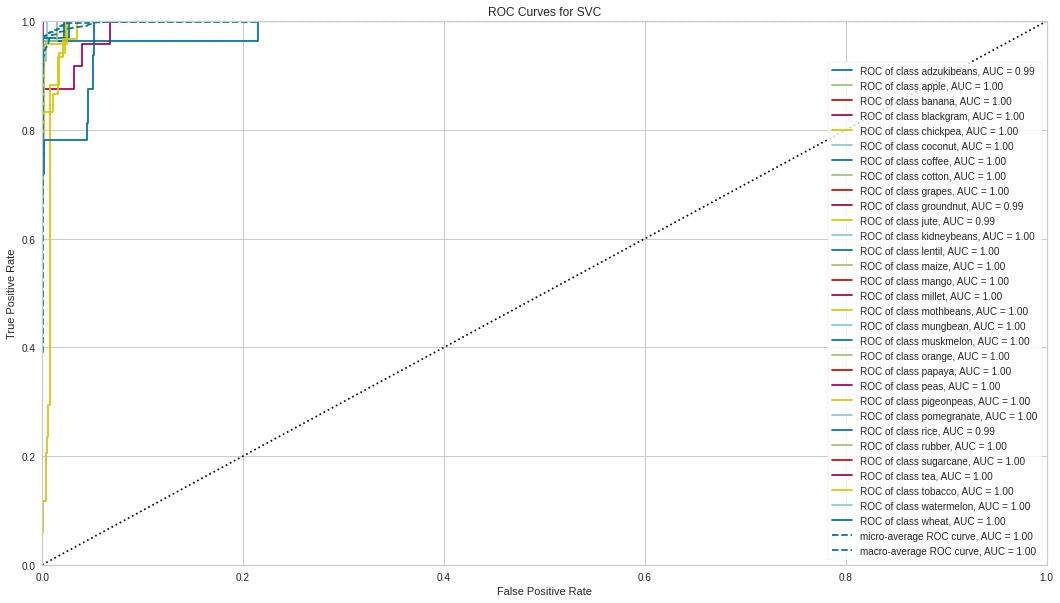

<Figure size 576x396 with 0 Axes>

In [ ]:
from yellowbrick.classifier.base import LabelEncoder
from yellowbrick.classifier import ROCAUC
encoder=LabelEncoder()

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=[ "adzukibeans", "apple","banana","blackgram", "chickpea", 'coconut',"coffee",
                                                "cotton","grapes","groundnut","jute","kidneybeans","lentil","maize","mango","millet",
                                                "mothbeans","mungbean","muskmelon","orange","papaya","peas","pigeonpeas","pomegranate",
                                                "rice","rubber","sugarcane","tea","tobacco","watermelon","wheat"],)
                                        
                                        
                                      
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer


fig,ax = plt.subplots(figsize=(18,10))
plot_ROC_curve(crops_SVC, X_train ,Y_train, X_test, Y_test) 
plt.savefig('ROC Curves for Support Vector Classifier.tiff', dpi=300) 

None  

**Plotting the Confusion Matrix for the Model**

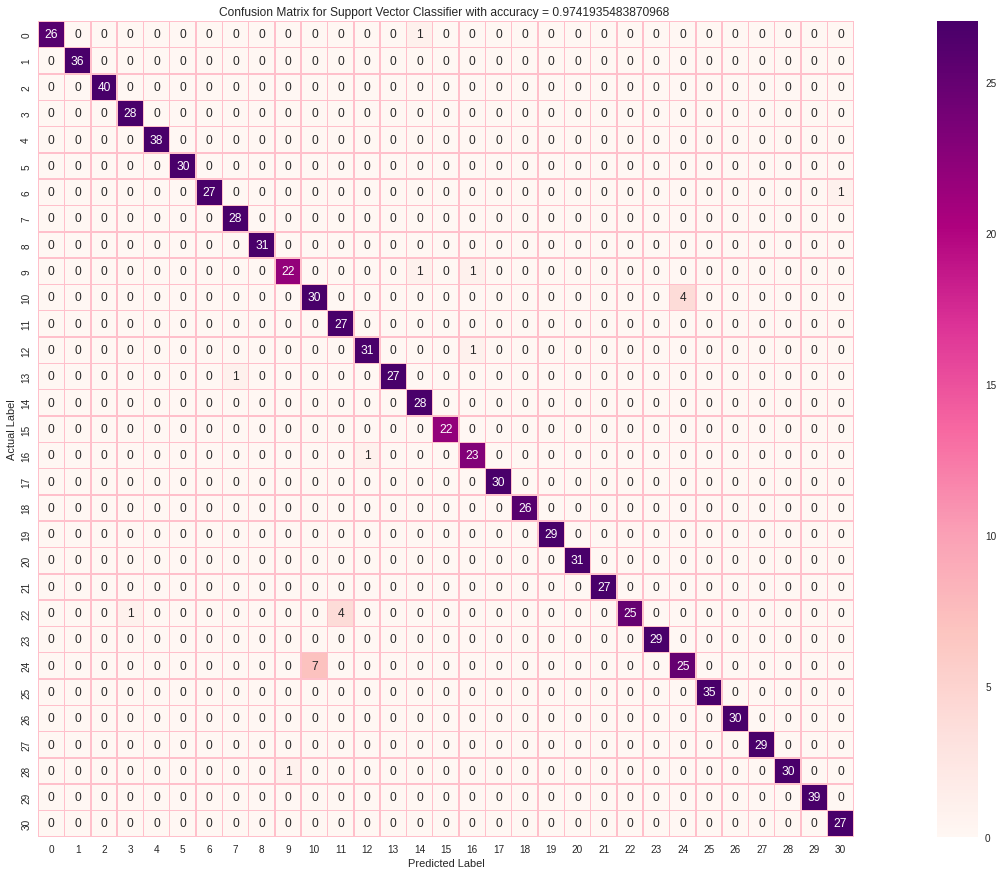

In [ ]:
cm_SVC=confusion_matrix(Y_test, Y_predict)

fig ,ax = plt.subplots(figsize=(30,15))
sns.heatmap(cm_SVC, annot= True, robust= True, cmap='RdPu' , linecolor = "pink" , linewidths=0.5 , square=True, ax = ax) 
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Support Vector Classifier with accuracy = {} ". format(accuracy_score(Y_test, Y_predict)))
plt.savefig('Confusion matrix for Support Vector Classifier.tiff', dpi=300)
plt.show()


# **DECISION TREE CLASSIFIER**

**Importing the Libraries**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
crops_DT=DecisionTreeClassifier()

**Training the model**

In [ ]:
crops_DT.fit(X_train, Y_train)

DecisionTreeClassifier()

**Testing the model**

In [ ]:
Y_predict=crops_DT.predict(X_test)

**Finding the Accuracy of the Model**

In [ ]:
DT_accuracy= accuracy_score(Y_test, Y_predict)
print(DT_accuracy)

0.9763440860215054


**Finding the Precision of the Model**

In [ ]:
DT_precision = precision_score(Y_test, Y_predict, average='macro')
print(DT_precision)

0.9768408788729913


**Finding the Recall of the Model**

In [ ]:
DT_recall = recall_score(Y_test, Y_predict, average='macro')
print(DT_recall)

0.9764035017545797


**Finding the F1 Score of the Model**

In [ ]:
DT_f1_score = f1_score(Y_test, Y_predict, average='macro')
print(DT_f1_score)

0.9764892643863132


In [ ]:
model.append("Decision Tree")
accuracy.append(DT_accuracy)
precision.append(DT_precision)
recall.append(DT_recall)
f1_scores.append(DT_f1_score)

In [ ]:
DT_report=classification_report(Y_test, Y_predict)
print(DT_report)

              precision    recall  f1-score   support

 adzukibeans       1.00      0.96      0.98        27
       apple       1.00      1.00      1.00        36
      banana       1.00      1.00      1.00        40
   blackgram       0.92      0.86      0.89        28
    chickpea       1.00      1.00      1.00        38
     coconut       0.97      1.00      0.98        30
      coffee       1.00      1.00      1.00        28
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        31
   groundnut       1.00      1.00      1.00        24
        jute       0.85      0.82      0.84        34
 kidneybeans       1.00      1.00      1.00        27
      lentil       0.94      0.94      0.94        32
       maize       1.00      0.96      0.98        28
       mango       0.97      1.00      0.98        28
      millet       1.00      1.00      1.00        22
   mothbeans       0.88      0.96      0.92        24
    mungbean       0.97    

**Plotting AUC-ROC Curve for the Model**

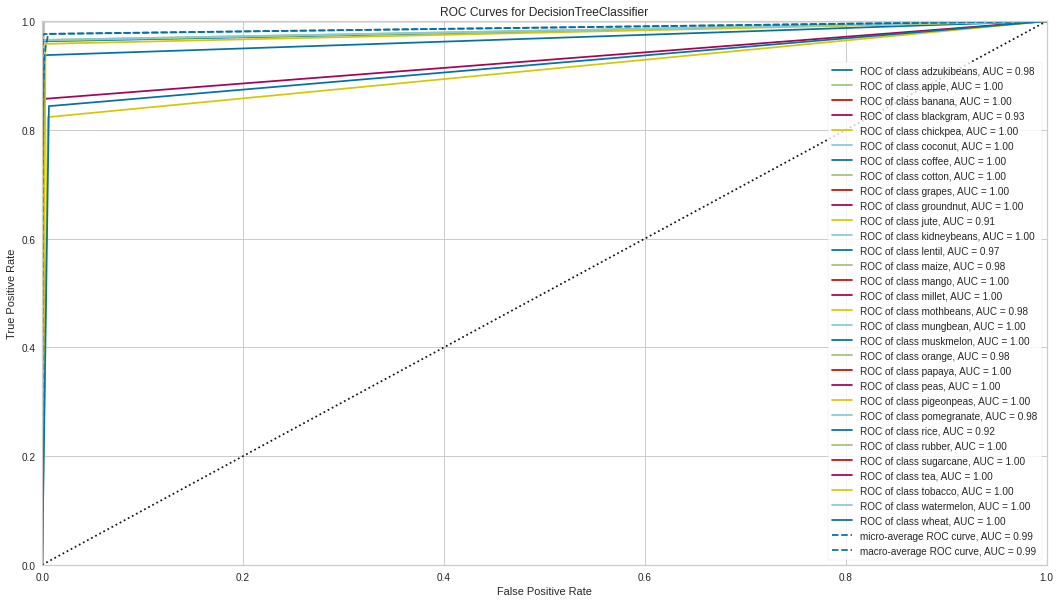

<Figure size 576x396 with 0 Axes>

In [ ]:
from yellowbrick.classifier.base import LabelEncoder
from yellowbrick.classifier import ROCAUC
encoder=LabelEncoder()

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=[ "adzukibeans", "apple","banana","blackgram", "chickpea", 'coconut',"coffee",
                                                "cotton","grapes","groundnut","jute","kidneybeans","lentil","maize","mango","millet",
                                                "mothbeans","mungbean","muskmelon","orange","papaya","peas","pigeonpeas","pomegranate",
                                                "rice","rubber","sugarcane","tea","tobacco","watermelon","wheat"],)
                                        
                                        
                                      
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer


fig,ax = plt.subplots(figsize=(18,10))
plot_ROC_curve(crops_DT, X_train ,Y_train, X_test, Y_test) 
plt.savefig('ROC Curves for Decision Tree Classifier.tiff', dpi=300) 

None  

**Plotting the Confusion Matrix for the Model**

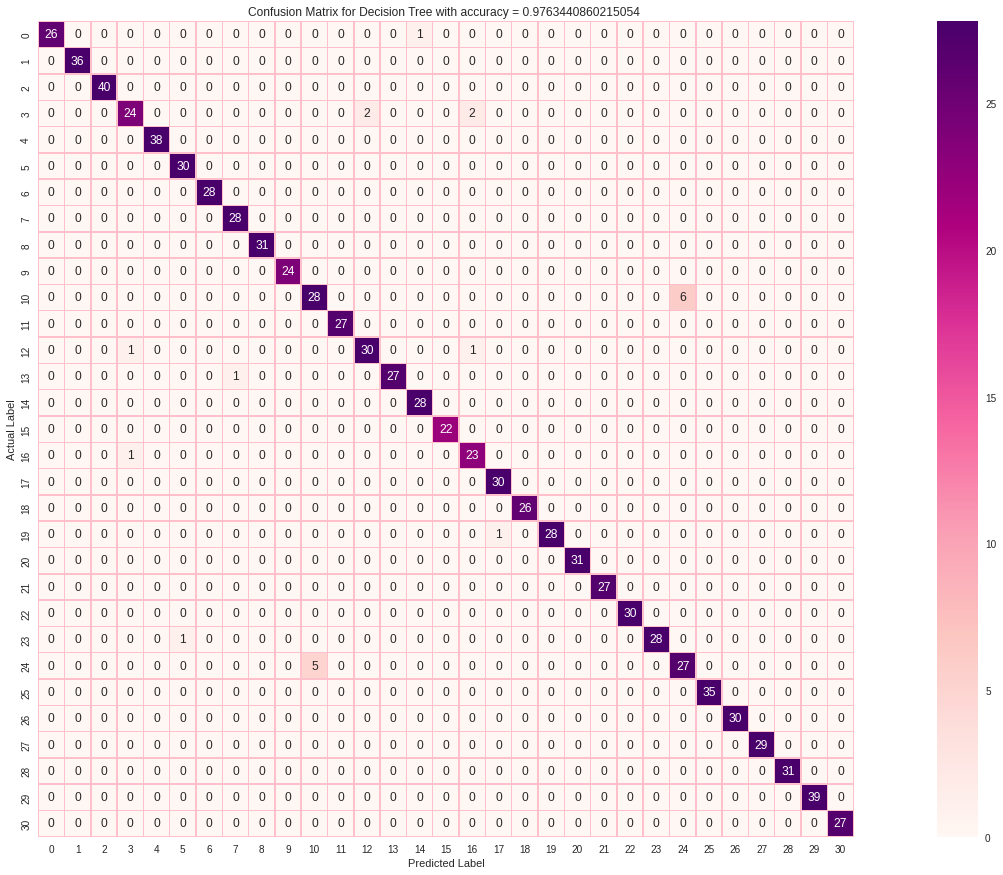

In [ ]:
cm_DT= confusion_matrix(Y_test, Y_predict)

fig, ax= plt.subplots(figsize=(30,15))
sns.heatmap(cm_DT, annot= True , robust=True, cmap='RdPu', linecolor="pink",linewidths=0.5 , square=True , ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Decision Tree with accuracy = {} ". format(accuracy_score(Y_test, Y_predict)))
plt.savefig('Confusion matrix for Decision Tree Classifier.tiff', dpi=300)
plt.show()

# **RANDOM FOREST CLASSIFIER**

**Importing the Libraries**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
crops_RF=RandomForestClassifier()

**Training the model**

In [ ]:
crops_RF.fit(X_train, Y_train)

RandomForestClassifier()

**Testing the model**

In [ ]:
Y_predict=crops_RF.predict(X_test)

**Finding the Accuracy of the Model**

In [ ]:
RF_accuracy=accuracy_score(Y_test,Y_predict)
RF_accuracy

0.9924731182795699

**Finding the Precision of the Model**

In [ ]:
RF_precision = precision_score(Y_test, Y_predict, average='macro')
print(RF_precision)

0.9935953795779773


**Finding the Recall of the Model**

In [ ]:
RF_recall = recall_score(Y_test, Y_predict, average='macro')
print(RF_recall)

0.9928161676857123


**Finding the F1 Score of the Model**

In [ ]:
RF_f1_score = f1_score(Y_test, Y_predict, average='macro')
print(RF_f1_score)

0.9929653460085596


In [ ]:
model.append("Random Forest")
accuracy.append(RF_accuracy)
precision.append(RF_precision)
recall.append(RF_recall)
f1_scores.append(RF_f1_score)

In [ ]:
RF_report=classification_report(Y_test, Y_predict)
print(RF_report)

              precision    recall  f1-score   support

 adzukibeans       1.00      0.96      0.98        27
       apple       1.00      1.00      1.00        36
      banana       1.00      1.00      1.00        40
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        38
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        31
   groundnut       1.00      1.00      1.00        24
        jute       0.85      1.00      0.92        34
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        28
       mango       1.00      1.00      1.00        28
      millet       1.00      1.00      1.00        22
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00    

**Plotting the AUC-ROC Curve for the Model**




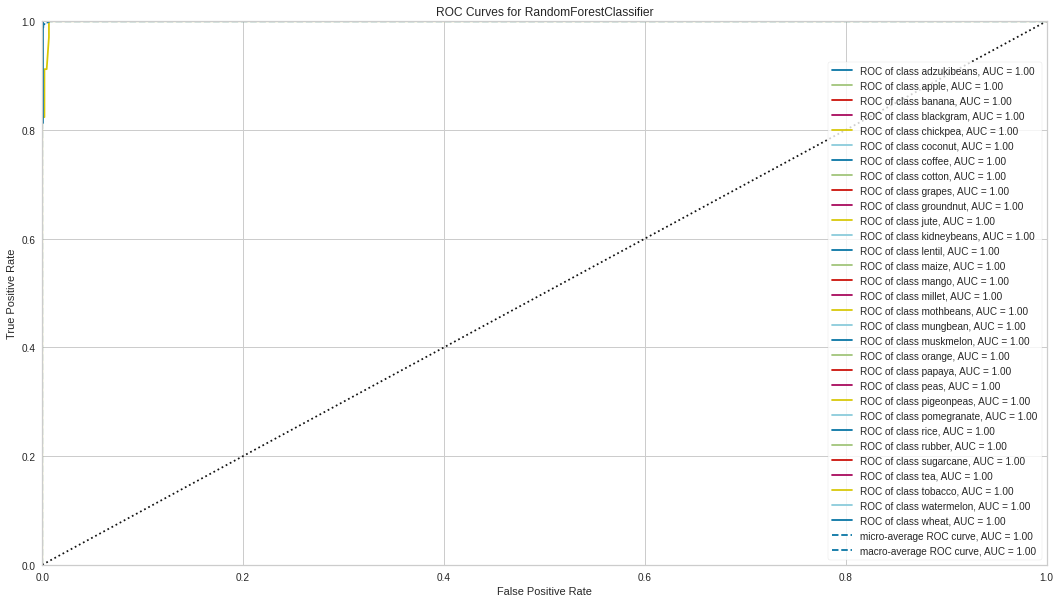

<Figure size 576x396 with 0 Axes>

In [ ]:
from yellowbrick.classifier.base import LabelEncoder
from yellowbrick.classifier import ROCAUC
encoder=LabelEncoder()

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=[ "adzukibeans", "apple","banana","blackgram", "chickpea", 'coconut',"coffee",
                                                "cotton","grapes","groundnut","jute","kidneybeans","lentil","maize","mango","millet",
                                                "mothbeans","mungbean","muskmelon","orange","papaya","peas","pigeonpeas","pomegranate",
                                                "rice","rubber","sugarcane","tea","tobacco","watermelon","wheat"],)
                                        
                                        
                                      
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer


fig,ax = plt.subplots(figsize=(18,10))
plot_ROC_curve(crops_RF, X_train ,Y_train, X_test, Y_test) 
plt.savefig('ROC Curves for Random Forest Classifier.tiff', dpi=300) 

None  

**Plotting the Confusion Matrix for the Model**

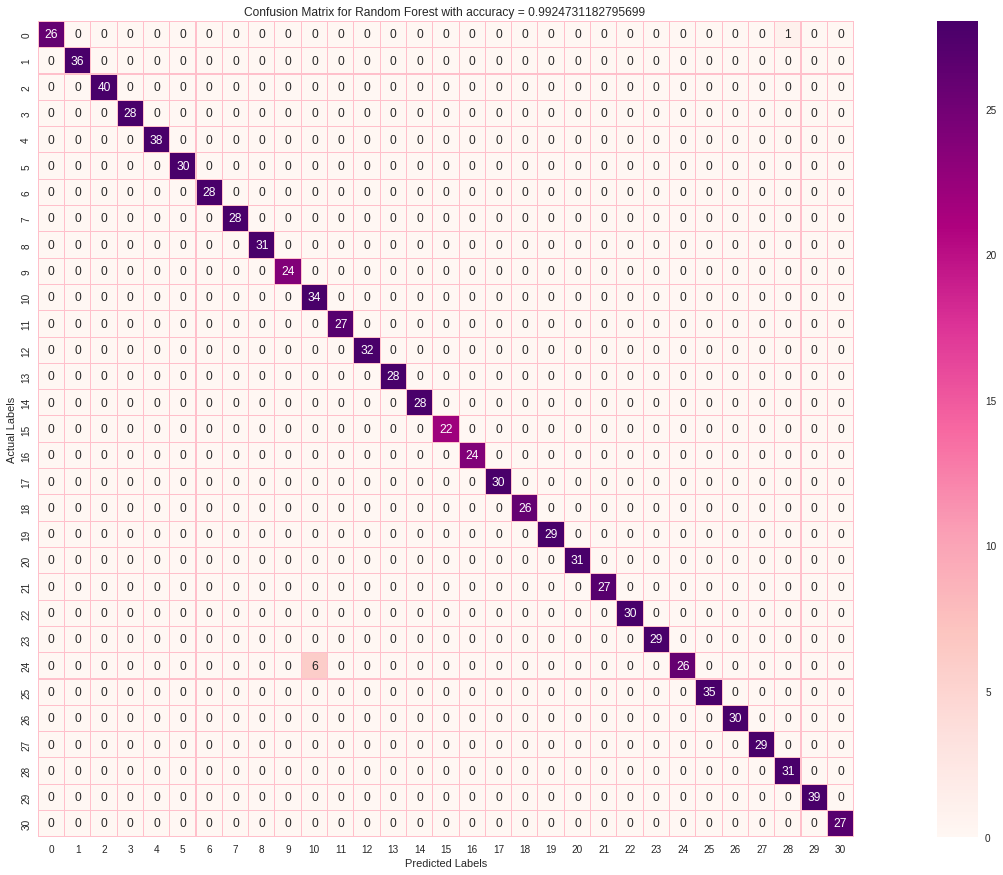

In [ ]:
cm_RF=confusion_matrix(Y_test, Y_predict)
fig, ax= plt.subplots(figsize=(30,15))
sns.heatmap( cm_RF , annot= True, robust=True , cmap='RdPu', linecolor='pink', linewidths=0.05 , square= True, ax=ax )
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Random Forest with accuracy = {} ".format(accuracy_score(Y_test, Y_predict)))
plt.savefig('Confusion matrix for Random Forest Classifier.tiff', dpi=300)
plt.show()

# **DECISION TREE CLASSIFIER (C.45 ALGORITHM)**

**Importing the Libraries**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
crops_DC=DecisionTreeClassifier(criterion= "log_loss")

**Training the model**

In [ ]:
crops_DC.fit(X_train, Y_train)

 

KeyError: ignored

**We tried to perform the C4.5 algorithm for our project but faced an issue regrading the sklearn version installed in google collab which is version 1.0.2. The C4.5 algorithm can only be implemented from sklearn version v1.1.2. 
We tried to uninstall the sklearn library and reinstall it to update the version as suggested by stack overflow and other tech sites. But no changes were observed. So due to technical constraints of the platform we weren't able to implement it. ****

**Testing the model**

In [ ]:
Y_predict=crops_DC.predict(X_test)

**Finding the Accuracy of the Model**

In [ ]:
DC_accuracy=accuracy_score(Y_test,Y_predict)
DC_accuracy

**Finding the Precision of the Model**

In [ ]:
DC_precision = precision_score(Y_test, Y_predict, average='macro')
print(DC_precision)

**Finding the Recall of the Model**

In [ ]:
DC_recall = recall_score(Y_test, Y_predict, average='macro')
print(DC_recall)

**Finding the F1 Score of the Model**

In [ ]:
DC_f1_score = f1_score(Y_test, Y_predict, average='macro')
print(DC_f1_score)

In [ ]:
model.append("Decision Tree Using C4.5")
accuracy.append(DC_accuracy)
precision.append(DC_precision)
recall.append(DC_recall)
f1_scores.append(DC_f1_score)

In [ ]:
DC_report=classification_report(Y_test, Y_predict)
print(DC_report)

**Plotting the AUC-ROC Curve for the Model**




In [ ]:
from yellowbrick.classifier.base import LabelEncoder
from yellowbrick.classifier import ROCAUC
encoder=LabelEncoder()

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=[ "adzukibeans", "apple","banana","blackgram", "chickpea", 'coconut',"coffee",
                                                "cotton","grapes","groundnut","jute","kidneybeans","lentil","maize","mango","millet",
                                                "mothbeans","mungbean","muskmelon","orange","papaya","peas","pigeonpeas","pomegranate",
                                                "rice","rubber","sugarcane","tea","tobacco","watermelon","wheat"],)
                                        
                                        
                                      
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer


fig,ax = plt.subplots(figsize=(18,10))
plot_ROC_curve(crops_DC, X_train ,Y_train, X_test, Y_test) 
plt.savefig('ROC Curves for Decision Tree Classifier using C4.5.tiff', dpi=300) 

None  

**Plotting the Confusion Matrix for the Model**

In [ ]:
cm_DC=confusion_matrix(Y_test, Y_predict)
fig, ax= plt.subplots(figsize=(30,15))
sns.heatmap( cm_DC , annot= True, robust=True , cmap='RdPu', linecolor='pink', linewidths=0.05 , square= True, ax=ax )
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Decision Tree using C4.5 with accuracy = {} ".format(accuracy_score(Y_test, Y_predict)))
plt.savefig('Confusion matrix for Decision Tree Classifier using C4.5.tiff', dpi=300)
plt.show()

# **MULTI-LAYER PERCEPTRON (MLP)**

**Importing the Libraries**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
 # as no. of max_iter increases the accuraccy improves to a certain level after that accuracy decreases
crops_MLP= MLPClassifier(max_iter=200)  


**Training the model**

In [ ]:
crops_MLP.fit(X_train ,Y_train)

MLPClassifier()

**Testing the model**

In [ ]:
Y_predict=crops_MLP.predict(X_test)

**Finding the Accuracy of the Model**

In [ ]:
MLP_accuracy=accuracy_score(Y_test, Y_predict)
print(MLP_accuracy)

0.9580645161290322


**Finding the Precision of the Model**

In [ ]:
MLP_precision=precision_score(Y_test,Y_predict, average='macro')
print(MLP_precision)

0.9616453092578136


**Finding the Recall of the Model**

In [ ]:
MLP_recall=recall_score(Y_test,Y_predict, average='macro')
print(MLP_recall)

0.9575416357523409


**Finding the F1 Score of the Model**

In [ ]:
MLP_f1_score=f1_score(Y_test,Y_predict, average='macro')
print(MLP_f1_score)

0.9565885002077354


In [ ]:
model.append("MLP")
accuracy.append(MLP_accuracy)
precision.append(MLP_precision)
recall.append(MLP_recall)
f1_scores.append(MLP_f1_score)

In [ ]:
MLP_report= classification_report(Y_test, Y_predict)
print(MLP_report)

              precision    recall  f1-score   support

 adzukibeans       1.00      0.96      0.98        27
       apple       1.00      1.00      1.00        36
      banana       1.00      1.00      1.00        40
   blackgram       0.86      0.89      0.88        28
    chickpea       1.00      1.00      1.00        38
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        28
      cotton       0.88      1.00      0.93        28
      grapes       1.00      1.00      1.00        31
   groundnut       0.96      0.96      0.96        24
        jute       0.77      1.00      0.87        34
 kidneybeans       0.96      1.00      0.98        27
      lentil       0.94      0.97      0.95        32
       maize       1.00      0.86      0.92        28
       mango       1.00      1.00      1.00        28
      millet       1.00      1.00      1.00        22
   mothbeans       0.80      0.83      0.82        24
    mungbean       1.00    

**Parameter Values for MLP**

In [ ]:
crops_MLP.get_params(True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
crops_MLP.hidden_layer_sizes

(100,)

**Plotting the AUC-ROC Curve for the Model**

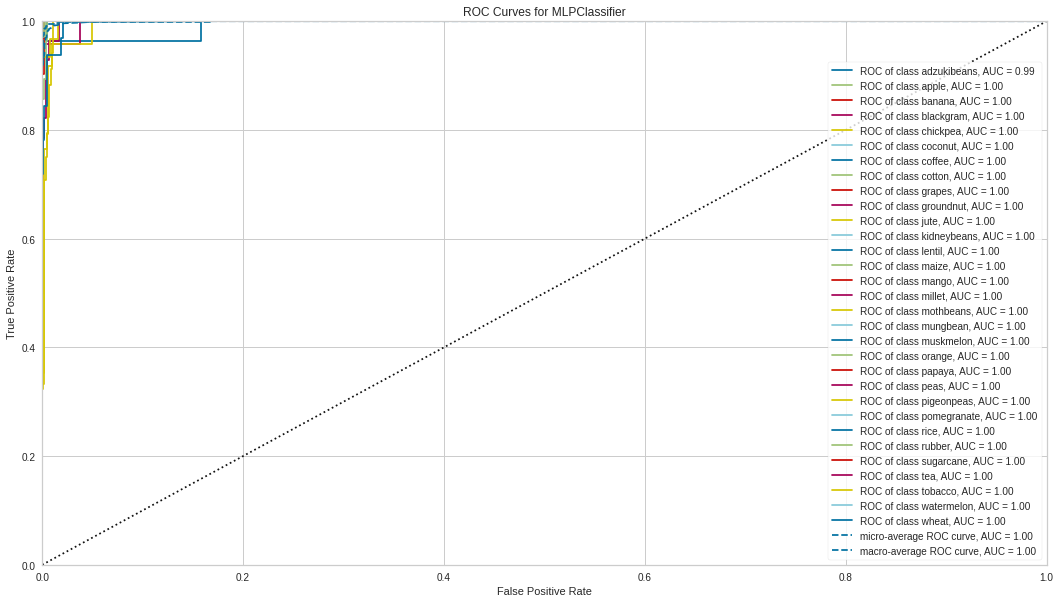

<Figure size 576x396 with 0 Axes>

In [ ]:
from yellowbrick.classifier.base import LabelEncoder
from yellowbrick.classifier import ROCAUC
encoder=LabelEncoder()

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=[ "adzukibeans", "apple","banana","blackgram", "chickpea", 'coconut',"coffee",
                                                "cotton","grapes","groundnut","jute","kidneybeans","lentil","maize","mango","millet",
                                                "mothbeans","mungbean","muskmelon","orange","papaya","peas","pigeonpeas","pomegranate",
                                                "rice","rubber","sugarcane","tea","tobacco","watermelon","wheat"],)
                                        
                                        
                                      
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer


fig,ax = plt.subplots(figsize=(18,10))
plot_ROC_curve(crops_MLP, X_train ,Y_train, X_test, Y_test) 
plt.savefig('ROC Curves for MLP Classifier.tiff', dpi=300) 

None  

**Plotting the Confusion Matrix for the Model**

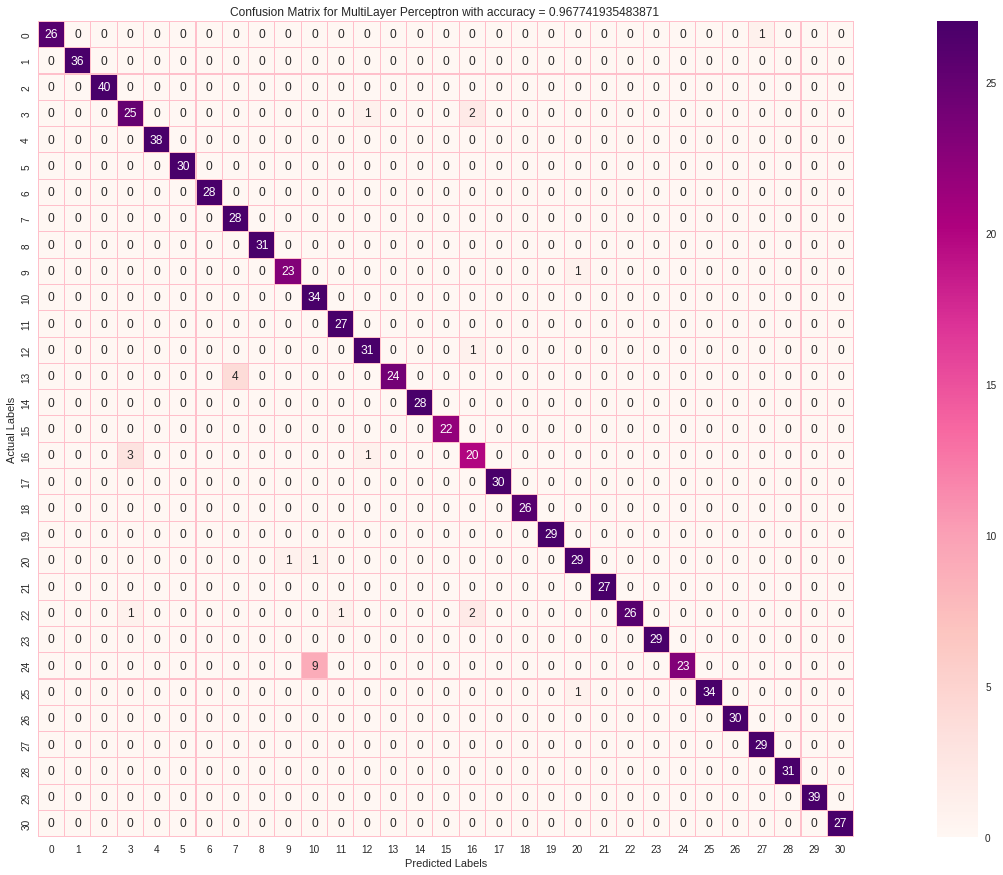

In [ ]:
cm_MLP= confusion_matrix(Y_test, Y_predict)
fig, ax= plt.subplots(figsize=(30,15))
sns.heatmap( cm_MLP , annot= True, robust=True , cmap='RdPu', linecolor='pink', linewidths=0.05 , square= True, ax=ax )
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for MultiLayer Perceptron with accuracy = {} ".format(accuracy_score(Y_test, Y_predict)))
plt.savefig('Confusion matrix for MultiLayer Perceptron.tiff', dpi=300)
plt.show()

# **PRINCIPAL COMPONENT ANALYSIS (PCA)**

**Importing the libraries**

In [ ]:
from sklearn.decomposition import PCA

**Scaling the features**

In [ ]:
Scaled_data=features

**Training the Model ( Reducing it to 2 features)**

In [ ]:
crops_PCA= PCA(n_components=2)

In [ ]:
features_r=crops_PCA.fit(Scaled_data).transform(Scaled_data)
features_r.shape

(3100, 2)

**Calculating the Explained Variance Ratio for the Model with 2 Features**

In [ ]:
print('Explained variance ratio (first two components): %s' % str(crops_PCA.explained_variance_ratio_))

for v in crops_PCA.explained_variance_ratio_:
    print('Explained variation per principal component: {}%'.format(round(v*100,2)))

print("Total variation for the model = {}% ". format(round(sum(crops_PCA.explained_variance_ratio_) *100),2))    

Explained variance ratio (first two components): [0.45319261 0.2847169 ]
Explained variation per principal component: 45.32%
Explained variation per principal component: 28.47%
Total variation for the model = 74% 


**2D Plot for PCA Analysis**

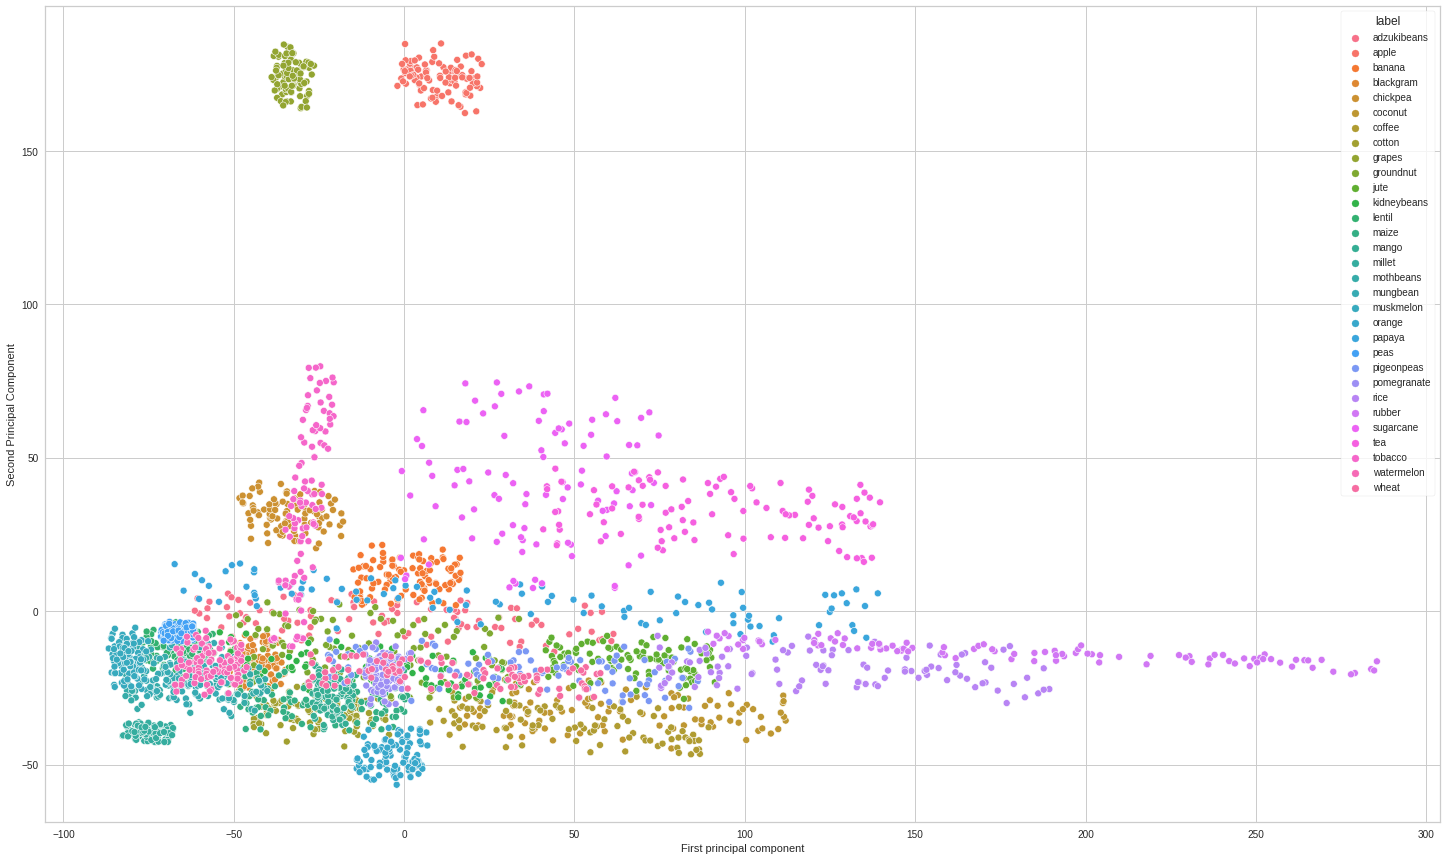

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.scatterplot(features_r[:,0], features_r[:,1] , hue='label', data=crops_df)
sns.move_legend(ax, "upper right")
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.savefig('2D Plot for PCA Analysis.tiff', dpi=300)
plt.show()

**After PCA Accuracy Score**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test= train_test_split(features_r, target, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
LG= LogisticRegression()
LG.fit(X_train,Y_train)
Y_predict = LG.predict(X_test)
PCA2_accuracy = accuracy_score(Y_test, Y_predict)
PCA2_precision = precision_score(Y_test, Y_predict, average='macro')
PCA2_recall = recall_score(Y_test, Y_predict, average='macro')
PCA2_f1_score = f1_score(Y_test, Y_predict, average='macro')


In [ ]:
model.append("PCA with 2 components")
accuracy.append(PCA2_accuracy)
precision.append(PCA2_precision)
recall.append(PCA2_recall)
f1_scores.append(PCA2_f1_score)


**Principal Component Analysis with 3 Components**

In [ ]:
crops_PCA_3 = PCA(n_components=3)
features_r=crops_PCA_3.fit(Scaled_data).transform(Scaled_data)
features_r.shape

(3100, 3)

In [ ]:
print('explained variance ratio (first three components): %s'
      % str(crops_PCA_3.explained_variance_ratio_))

for v in crops_PCA_3.explained_variance_ratio_:
    print('Explained variation per principal component: {}%'.format(round(v*100,2)))

print("Total variation for the model = {}% ". format(round(sum(crops_PCA_3.explained_variance_ratio_) *100),2))    

explained variance ratio (first three components): [0.45319261 0.2847169  0.16165643]
Explained variation per principal component: 45.32%
Explained variation per principal component: 28.47%
Explained variation per principal component: 16.17%
Total variation for the model = 90% 


In [ ]:
First=features_r[:,0]
Second=features_r[:,1]
Third=features_r[:,2]


**3-D plot for the model**

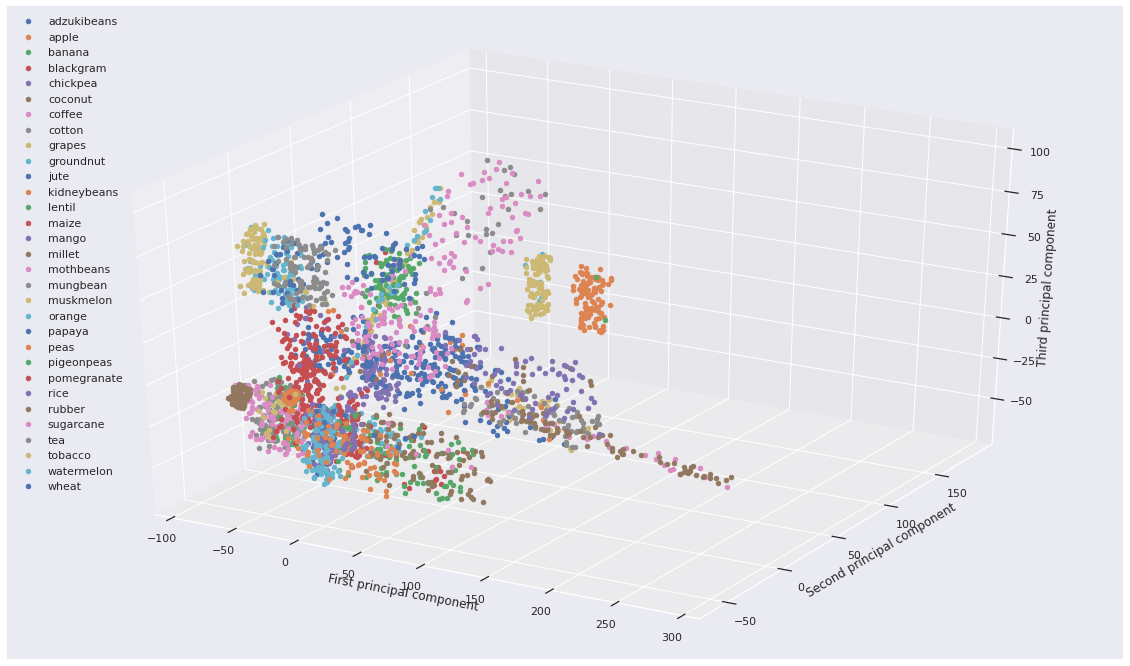

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(111, projection = '3d')
i=0

for l in label_names:
  x = First[i : i+99]
  y = Second[i : i+99]
  z = Third[i : i+99]
  ax.scatter(x, y, z, label=l,depthshade=False)
  i=i+99


ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_zlabel("Third principal component")
ax.legend(loc="upper left")
plt.savefig('3-D Plot for PCA Analysis.tiff', dpi=300)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test= train_test_split(features_r, target, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
LG3= LogisticRegression()
LG3.fit(X_train,Y_train)
Y_predict = LG3.predict(X_test)
PCA3_accuracy = accuracy_score(Y_test, Y_predict)
PCA3_precision = precision_score(Y_test, Y_predict , average='macro')
PCA3_recall = recall_score(Y_test, Y_predict, average='macro')
PCA3_f1_score = f1_score(Y_test, Y_predict, average='macro')

In [ ]:
model.append("PCA with 3 components")
accuracy.append(PCA3_accuracy)
precision.append(PCA3_precision)
recall.append(PCA3_recall)
f1_scores.append(PCA3_f1_score)

# **Unsupervised Learning - Clustering**

# **K Means**

**Data for applying Clustering**

In [ ]:
Clustering_data = features
print(Clustering_data .shape)
Clustering_data .head()

(3100, 7)


N      P      K  temperature   humidity        ph    rainfall
0  52.02  37.02  51.34     1.395179  46.579188  6.332919  105.272329
1  62.71  47.71  58.47    51.750697  54.662403  6.511772  166.146187
2  61.46  46.46  57.64    53.017400  49.864205  5.299104   65.959049
3  53.83  38.83  52.55    53.211092  61.440867  5.322864   64.152838
4  57.43  42.43  54.95    50.875089  52.118891  7.377994  163.452682

## **Applying K means Clustering**

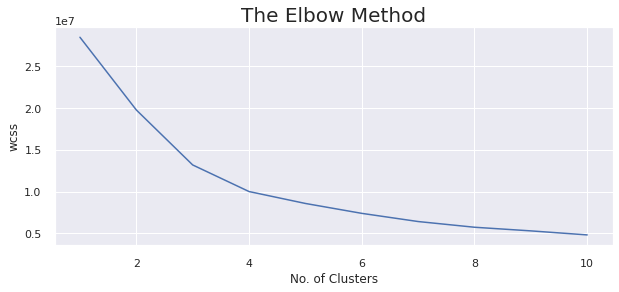

In [ ]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Clustering_data)
    wcss.append(km.inertia_)

# plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.savefig('K Means Elbow method.tiff', dpi=300)
plt.show()

## **K-Means Prediction**

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(Clustering_data)

# find out the Results
a = target
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

print("Lets Check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['adzukibeans' 'blackgram' 'chickpea' 'coconut' 'groundnut' 'kidneybeans'
 'lentil' 'maize' 'mango' 'millet' 'mothbeans' 'mungbean' 'orange'
 'papaya' 'peas' 'pigeonpeas' 'pomegranate' 'tobacco']
---------------------------------------------------------------
Crops in Second Cluster: ['apple' 'grapes']
---------------------------------------------------------------
Crops in Third Cluster: ['adzukibeans' 'coconut' 'coffee' 'jute' 'papaya' 'pigeonpeas' 'rice'
 'rubber' 'sugarcane' 'tea']
---------------------------------------------------------------
Crops in Fourth Cluster: ['adzukibeans' 'banana' 'coffee' 'cotton' 'jute' 'maize' 'muskmelon'
 'papaya' 'sugarcane' 'tobacco' 'watermelon' 'wheat']


# **Hierarchical Clustering using AGNES**

In [ ]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_her= hc.fit_predict(Clustering_data)  

# finding out the Results
b = target
y_herr = pd.DataFrame(y_her)
w = pd.concat([y_herr, b], axis = 1)
w= w.rename(columns = {0: 'cluster'})

# checking the Clusters of each Crops
print("Hierachical Clustering Analysis \n")
print("Crops in Zero Cluster:", w[w['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in First Cluster:", w[w['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", w[w['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", w[w['cluster'] == 3]['label'].unique())

Hierachical Clustering Analysis 

Crops in Zero Cluster: ['adzukibeans' 'blackgram' 'chickpea' 'groundnut' 'kidneybeans' 'lentil'
 'mango' 'millet' 'mothbeans' 'mungbean' 'muskmelon' 'orange' 'papaya'
 'peas' 'pigeonpeas' 'pomegranate' 'tobacco' 'watermelon']
---------------------------------------------------------------
Crops in First Cluster: ['coconut' 'coffee' 'jute' 'papaya' 'rice' 'rubber' 'tea']
---------------------------------------------------------------
Crops in Second Cluster: ['apple' 'grapes']
---------------------------------------------------------------
Crops in Third Cluster: ['banana' 'coffee' 'cotton' 'maize' 'sugarcane' 'wheat']


In [ ]:
Clustering_data=Clustering_data.values

## **Visualizing the Clusters**

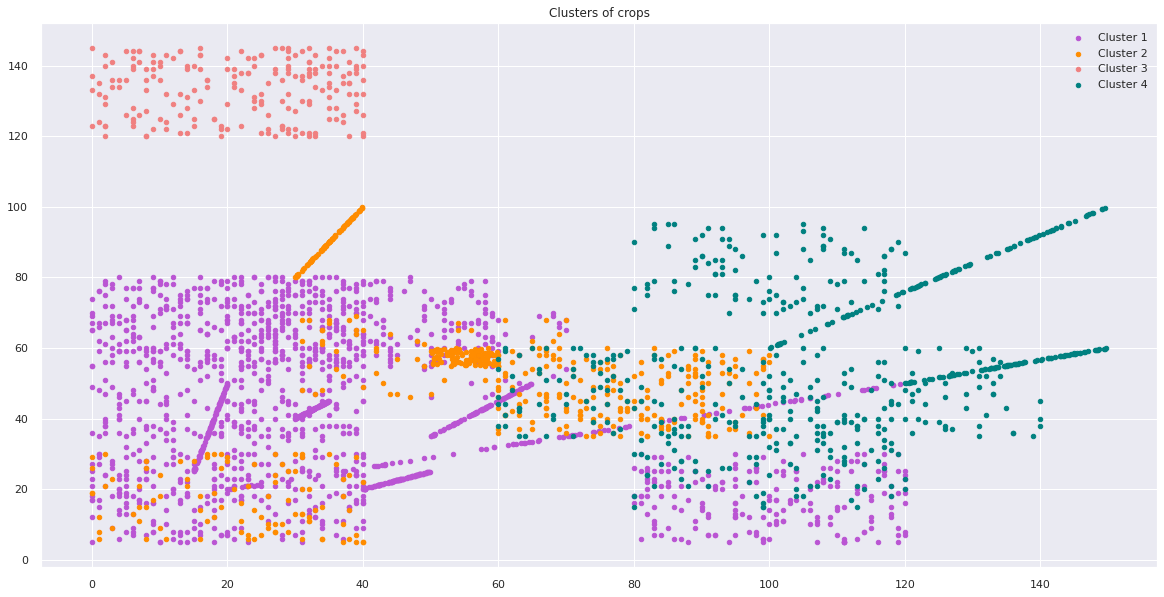

In [ ]:
fig,ax= plt.subplots(figsize=(20,10))
plt.scatter(Clustering_data[y_her == 0, 0],Clustering_data[y_her == 0, 1], s = 20, c = 'mediumorchid', label = 'Cluster 1')  
plt.scatter(Clustering_data[y_her == 1, 0], Clustering_data[y_her == 1, 1], s = 20, c = 'darkorange', label = 'Cluster 2')  
plt.scatter(Clustering_data[y_her== 2, 0], Clustering_data[y_her == 2, 1], s = 20, c = 'lightcoral', label = 'Cluster 3')  
plt.scatter(Clustering_data[y_her == 3, 0], Clustering_data[y_her == 3, 1], s = 20, c = 'teal', label = 'Cluster 4')  
plt.title('Clusters of crops')  
plt.legend()  
plt.savefig('Visualizing clusters .tiff', dpi=300)
plt.show()

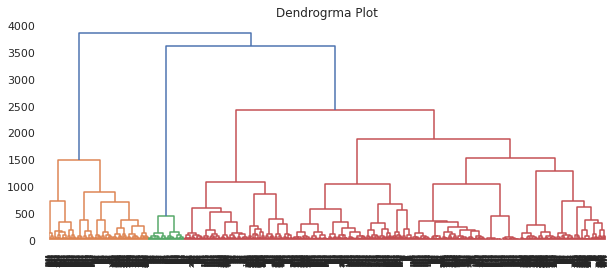

In [ ]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(Clustering_data, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.savefig('Dendrogrma Plot .tiff', dpi=300)
plt.show()

# **Hyper Parameter tuning for KNN.**

**Importing the Libraries**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = accuracy_score(Y_test, yhat)

mean_acc

array([0.97526882, 0.97419355, 0.97956989, 0.97419355, 0.97849462,
       0.97526882, 0.97741935, 0.97096774, 0.97096774, 0.9688172 ,
       0.97204301, 0.9688172 , 0.97096774, 0.97096774, 0.9688172 ,
       0.96989247, 0.9688172 , 0.9688172 , 0.9688172 , 0.96774194])

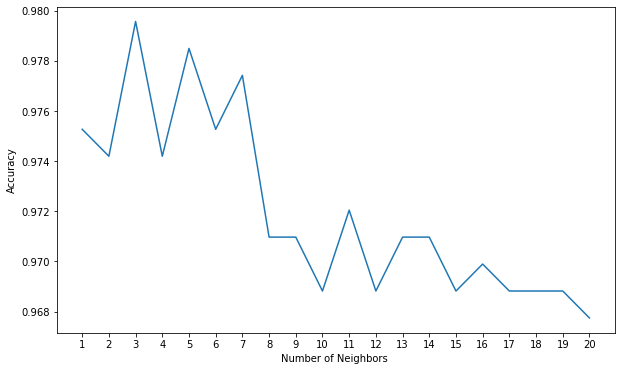

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

 **We will use three hyperparamters- n-neighbors, weights and metric:**
1. neighbors: Decide the best k based on the values we have computed earlier.  
2. weights: Check whether adding weights to the data points is beneficial to  the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points. 
3. metric: The distance metric to be used will calculating the similarity. 

In [ ]:
grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, Y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [ ]:
g_res.best_score_

0.9811055582301084

**Getting the best parameters**

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}

**Training the model**

In [ ]:
crops_knn_1 = KNeighborsClassifier(n_neighbors = 12, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
crops_knn_1.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=12,
                     weights='distance')

**Testing the Model**

In [ ]:
Y_predict=crops_knn_1.predict(X_test)

**Finding the Accuracy of the Model**

In [ ]:
KNN1_accuracy= accuracy_score(Y_test, Y_predict)
print(KNN1_accuracy)

0.9795698924731183


**Finding the Precision of the Model**

In [ ]:
KNN1_precision = precision_score(Y_test, Y_predict, average='macro')
print(KNN1_precision)

0.9824027513667037


**Finding the Recall of the Model**

In [ ]:
KNN1_recall = recall_score(Y_test, Y_predict, average='macro')
print(KNN1_recall)

0.9794851811692419


**Finding the F1 Score of the Model**

In [ ]:
KNN1_f1_score = f1_score(Y_test, Y_predict, average='macro')
print(KNN1_f1_score)

0.9794547826384535


In [ ]:
model.append("K Nearest Neighbours after hyperparameter tuning")
accuracy.append(KNN1_accuracy)
precision.append(KNN1_precision)
recall.append(KNN1_recall)
f1_scores.append(KNN1_f1_score)

In [ ]:
KNN1_report=classification_report(Y_test, Y_predict)
print(KNN1_report)

              precision    recall  f1-score   support

 adzukibeans       1.00      1.00      1.00        27
       apple       1.00      1.00      1.00        36
      banana       1.00      1.00      1.00        40
   blackgram       0.93      1.00      0.97        28
    chickpea       1.00      1.00      1.00        38
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        28
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        31
   groundnut       1.00      1.00      1.00        24
        jute       0.79      0.97      0.87        34
 kidneybeans       0.90      1.00      0.95        27
      lentil       0.94      1.00      0.97        32
       maize       1.00      0.96      0.98        28
       mango       1.00      1.00      1.00        28
      millet       1.00      1.00      1.00        22
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00    

**Plotting AUC-ROC Curve for Model**

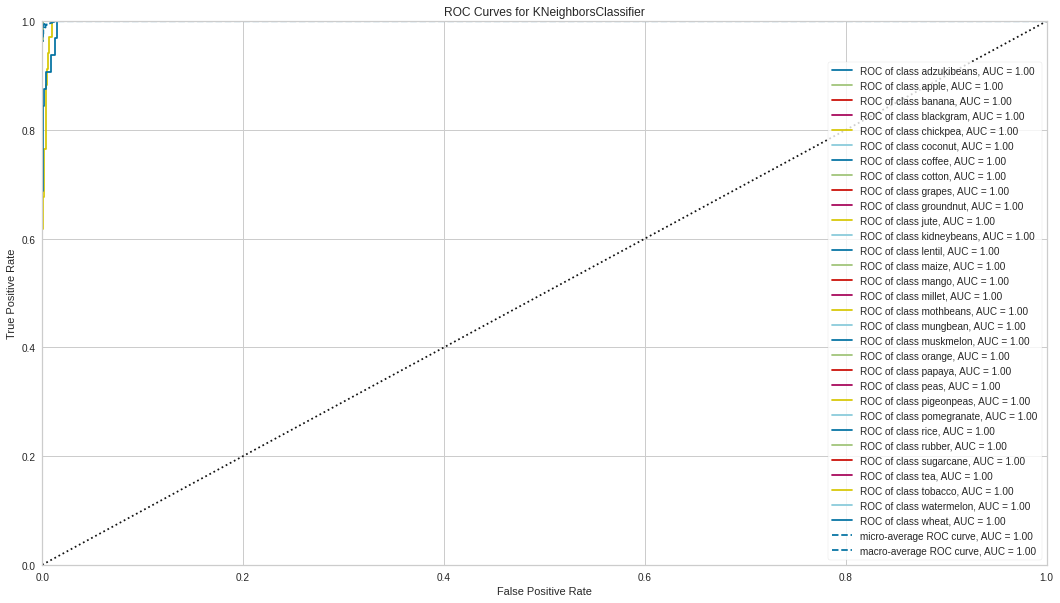

<Figure size 576x396 with 0 Axes>

In [ ]:
from yellowbrick.classifier.base import LabelEncoder
from yellowbrick.classifier import ROCAUC
encoder=LabelEncoder()

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=[ "adzukibeans", "apple","banana","blackgram", "chickpea", 'coconut',"coffee",
                                                "cotton","grapes","groundnut","jute","kidneybeans","lentil","maize","mango","millet",
                                                "mothbeans","mungbean","muskmelon","orange","papaya","peas","pigeonpeas","pomegranate",
                                                "rice","rubber","sugarcane","tea","tobacco","watermelon","wheat"],)
                                        
                                        
                                      
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()



    return visualizer


fig,ax = plt.subplots(figsize=(18,10))
plot_ROC_curve(crops_knn_1, X_train ,Y_train, X_test, Y_test) 
plt.savefig('ROC Curves for K-Nearest Neighbours after hyperparameter tuning.png', dpi=300) 
plt.show()
None  

**Plotting the Confusion Matrix for the Model**

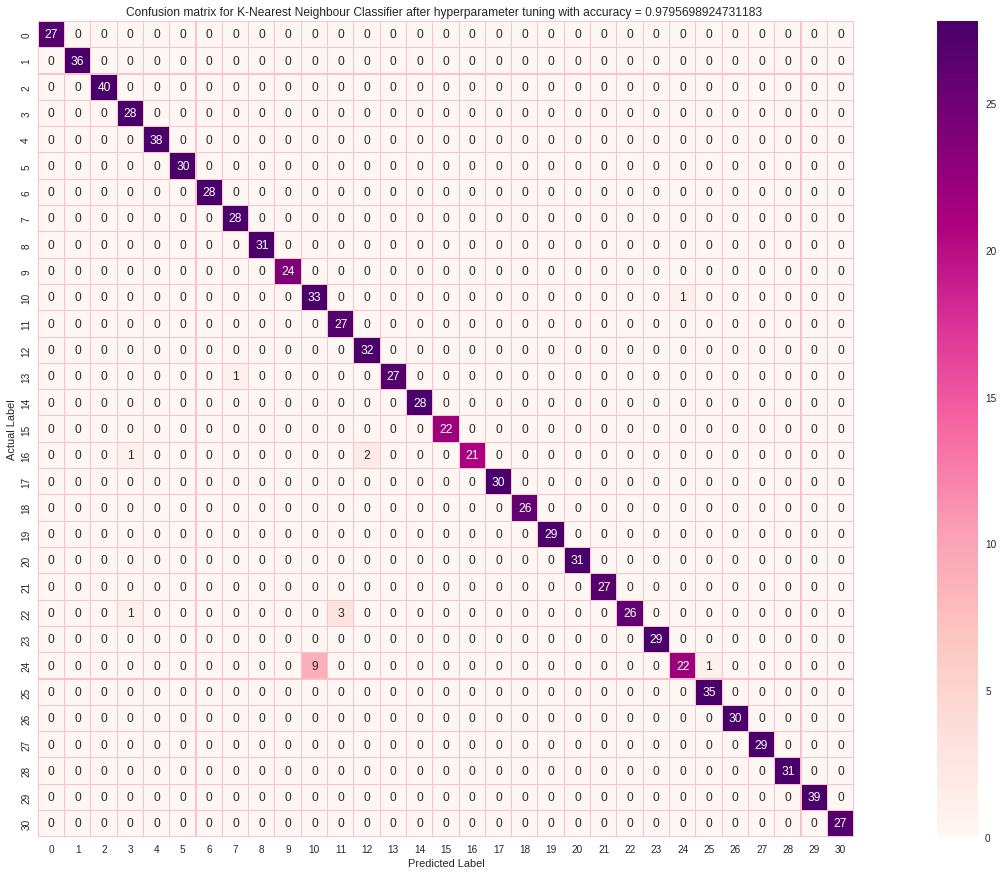

In [ ]:
cm_KNN1=confusion_matrix(Y_test, Y_predict)

fig, ax= plt.subplots(figsize=(30,15))
sns.heatmap(cm_KNN1, annot=True,robust=True, cmap='RdPu' ,linecolor='pink', linewidths=0.05, square=True, ax=ax )
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion matrix for K-Nearest Neighbour Classifier after hyperparameter tuning with accuracy = {} ". format(accuracy_score(Y_test, Y_predict)))
plt.savefig('Confusion matrix for K-Nearest Neighbour Classifier after hyperparameter tuning.tiff', dpi=300)
plt.show()

# **Comparing Accuracy Of Various Classification Models**

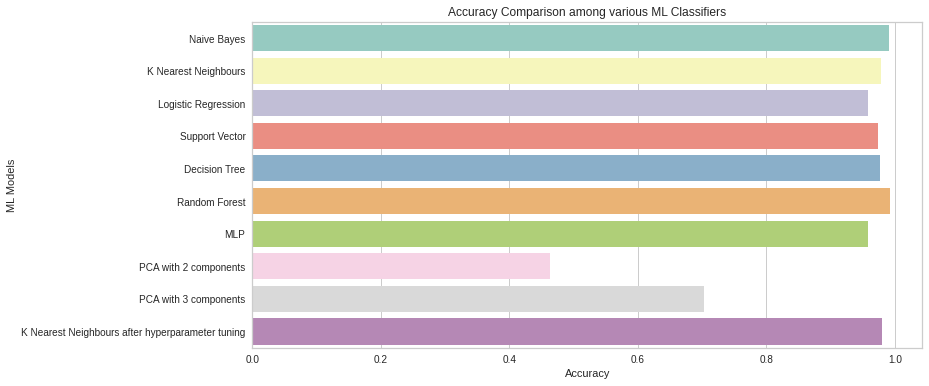

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = accuracy , y = model ,palette ='Set3'  )
plt.xlabel("Accuracy")
plt.ylabel("ML Models")
plt.title("Accuracy Comparison among various ML Classifiers")
plt.savefig('Comparing Accuracy Of Various Classification Models.tiff', dpi=300)
None



# **Comparing Precision Score Of Various Classification Models**

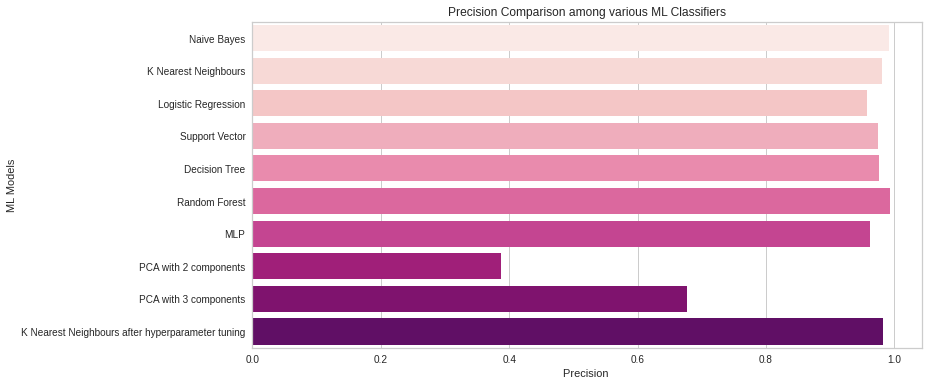

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = precision , y = model ,palette ='RdPu' )
plt.xlabel("Precision ")
plt.ylabel("ML Models")
plt.title("Precision Comparison among various ML Classifiers")
plt.savefig('Comparing Precision Score Of Various Classification Models.tiff', dpi=300)
None

# **Comparing Recall Score Of Various Classification Models**

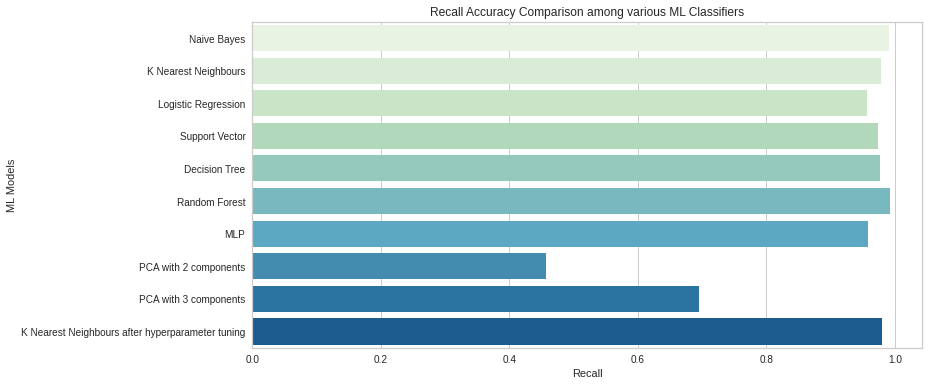

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = recall , y = model ,palette ='GnBu' )
plt.xlabel("Recall")
plt.ylabel("ML Models")
plt.title("Recall Accuracy Comparison among various ML Classifiers")
plt.savefig('Comparing Recall Accuracy Of Various Classification Models.tiff', dpi=300)
None

# **Comparing F1 Scores Of Various Classification Models**

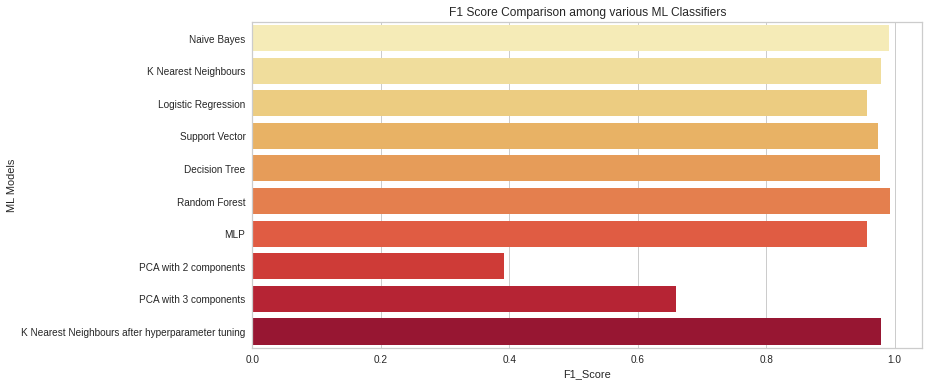

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = f1_scores , y = model ,palette ='YlOrRd' )
plt.xlabel("F1_Score")
plt.ylabel("ML Models")
plt.title("F1 Score Comparison among various ML Classifiers")
plt.savefig('Comparing F1 Score Of Various Classification Models.tiff', dpi=300)
None

# **CONCLUSION**

**Hence Random Forest, Naive Bayes, and KNN with hyperparameter tuning prove out to be the best classifer models for our project- "Crop Prediction using Machine Learning , A Step towards Self Reliance"**

# **THANK YOU**